En este documento realizamos un análisis detallado de los ingresos presupuestarios percibidos en Brasil entre 2013 y 2021. Analizaremos los ingresos por categoría económica, por órgano administrativo y temporalmente.

`Importante`

Dentro del análisis tendremos que tener en cuenta que el valor registrado (valor lancado) y el valor recaudado (valor realizado) deberían ser iguales, ya que lo que se registra contablemente debe ser igual a lo que se recibe finalmente contablemente. En caso de que se produzcan diferencias entre ambos valores para cada entrada, será necesario observar las razones por las cuales se produce esta casuística. 

Indicamos a continuación el significado de las columnas que contienen valores de ingresos:

- Previsión del ingreso (valor previsto atualizado): previsión del ingreso a recaudar
- Ingreso registrado (valor lancado): valor del ingreso registrado "contablemente".
- Ingreso recaudado (valor realizado): valor del ingreso recaudado finalmente. 
- Importe recaudado sobre la previsión (percentual realizado): porcentaje de la previsión recaudado finalmente. 

In [1]:
import pandas as pd # type: ignore
import numpy as np # type: ignore
import seaborn as sns # type: ignore
import matplotlib.pyplot as plt # type: ignore
from src import funciones_soporte as fs

In [2]:
pd.options.display.float_format = '{:,.2f}'.format

In [2]:
datos_brasil = pd.read_pickle("datos/datos_brasil.pkl")
print(datos_brasil.shape)
datos_brasil.head(1)

(1026299, 16)


,CÓDIGO ÓRGÃO SUPERIOR,NOME ÓRGÃO SUPERIOR,CÓDIGO ÓRGÃO,NOME ÓRGÃO,CÓDIGO UNIDADE GESTORA,NOME UNIDADE GESTORA,CATEGORIA ECONÔMICA,ORIGEM RECEITA,ESPÉCIE RECEITA,DETALHAMENTO,VALOR PREVISTO ATUALIZADO,VALOR LANÇADO,VALOR REALIZADO,PERCENTUAL REALIZADO,DATA LANÇAMENTO,ANO EXERCÍCIO
0,63000,Advocacia-Geral da União,63000,Advocacia-Geral da União - Unidades com víncul...,110060,COORD. GERAL DE ORC. FIN. E ANAL. CONT. - AGU,Receitas Correntes,Outras Receitas Correntes,"Bens, Direitos e Valores Incorporados ao Patr",REC.DIVIDA ATIVA NAO TRIBUTARIA DE OUTRAS REC,0.0,0.0,1297.13,0.0,2013-12-31,2013


## *Evolución temporal*

En este apartado nos encontraremos con un análisis temporal de los ingresos. Revisaremos las diferencias entre los valores previstos y los recaudados finalmente, así como entre los ingresos registrados y los recaudados realmente. 

### *Previsiones y recaudacion*

In [4]:
# Filtramos el dataframe para quedarnos solo con las columnas de fecha de registro del ingreso y los valores de ingresos.
df_comp_recaudacion_prevision = datos_brasil.iloc[: ,[10, 12, 14]]
df_comp_recaudacion_prevision["Año"] = df_comp_recaudacion_prevision["DATA LANÇAMENTO"].dt.strftime("%Y")
df_comp_recaudacion_prevision

C:\Users\gabri\AppData\Local\Temp\ipykernel_16168\2635946192.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_comp_recaudacion_prevision["Año"] = df_comp_recaudacion_prevision["DATA LANÇAMENTO"].dt.strftime("%Y")


,VALOR PREVISTO ATUALIZADO,VALOR REALIZADO,DATA LANÇAMENTO,Año
0,0.00,"1,297.13",2013-12-31,2013
1,0.00,"26,666,621.42",2013-12-31,2013
2,0.00,"301,251.13",2013-12-31,2013
3,0.00,"1,855.58",2013-12-31,2013
4,0.00,"52,140.68",2013-12-31,2013
...,...,...,...,...
1026294,"16,940,891.00",0.00,2021-04-23,2021
1026295,0.00,372.90,2021-11-22,2021
1026296,"200,000.00",0.00,2021-04-23,2021
1026297,0.00,"1,000,000.00",2021-05-10,2021


In [5]:
df_agrupado = df_comp_recaudacion_prevision.groupby("Año")[["VALOR PREVISTO ATUALIZADO","VALOR REALIZADO"]].sum()
df_agrupado["porcentaje_recaudacion"] = round((df_agrupado["VALOR REALIZADO"]/df_agrupado["VALOR PREVISTO ATUALIZADO"]) *100, 2)
df_agrupado

,VALOR PREVISTO ATUALIZADO,VALOR REALIZADO,porcentaje_recaudacion
Año,,,
2013,"2,174,650,946,322.04","1,893,613,719,099.78",87.08
2014,"2,392,129,226,119.23","2,238,551,079,327.88",93.58
2015,"2,878,827,555,613.92","2,665,685,375,159.13",92.60
2016,"2,952,696,248,075.54","2,839,711,583,462.82",96.17
2017,"3,414,379,614,681.84","2,558,047,412,866.96",74.92
2018,"3,505,648,331,810.28","2,942,387,872,873.97",83.93
2019,"3,261,378,698,948.11","2,991,564,738,258.26",91.73
2020,"3,577,146,718,910.25","3,631,448,629,524.17",101.52
2021,"4,180,716,471,387.52","3,876,372,024,873.04",92.72


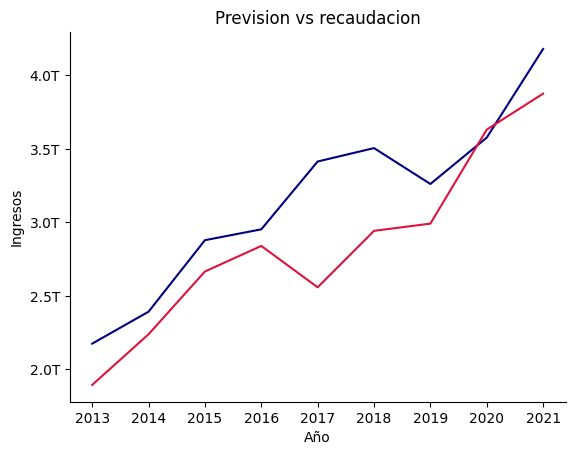

In [6]:
fs.evolucion_temporal(df_agrupado, "Año", ["VALOR PREVISTO ATUALIZADO", "VALOR REALIZADO"])

Como podemos ver en ambos gráficos tanto la previsión, como la recaudación real de los ingresos públicos de Brasil presentan una tendencia al alza a lo largo de los años. Aún así observamos que la recaudación anual presenta valores inferiores en todos los años a la previsión recaudada. Principalmente vemos una importante reducción en la recaudación anual en 2017, año en el cual se esperaba ingresar un total de 3.414.379.614.681,84 $, de los cuales se ingresaron solo un 74,92 %. Esto puede deberse a la crisis económica que sufrió el país entre 2015 y 2016. 

### *Ingresos registrados e ingresos recaudados*

In [6]:
# Filtramos el dataframe para quedarnos solo con las columnas de fecha de registro del ingreso y los valores de ingresos.
df_comp_recaudacion_registro = datos_brasil.iloc[: ,[11, 12, 14]]
df_comp_recaudacion_registro["Año"] = df_comp_recaudacion_registro["DATA LANÇAMENTO"].dt.strftime("%Y")
df_comp_recaudacion_registro

C:\Users\gabri\AppData\Local\Temp\ipykernel_16168\2262978967.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_comp_recaudacion_registro["Año"] = df_comp_recaudacion_registro["DATA LANÇAMENTO"].dt.strftime("%Y")


,VALOR LANÇADO,VALOR REALIZADO,DATA LANÇAMENTO,Año
0,0.00,"1,297.13",2013-12-31,2013
1,0.00,"26,666,621.42",2013-12-31,2013
2,0.00,"301,251.13",2013-12-31,2013
3,0.00,"1,855.58",2013-12-31,2013
4,0.00,"52,140.68",2013-12-31,2013
...,...,...,...,...
1026294,0.00,0.00,2021-04-23,2021
1026295,0.00,372.90,2021-11-22,2021
1026296,0.00,0.00,2021-04-23,2021
1026297,0.00,"1,000,000.00",2021-05-10,2021


In [7]:
df_agrupado2 = df_comp_recaudacion_registro.groupby("Año")[["VALOR LANÇADO","VALOR REALIZADO"]].sum()
df_agrupado2["diferencia recaudacion"] = df_agrupado2["VALOR LANÇADO"] - df_agrupado2["VALOR REALIZADO"]
df_agrupado2

,VALOR LANÇADO,VALOR REALIZADO,diferencia recaudacion
Año,,,
2013,"1,142,556,841,623.94","1,893,613,719,099.78","-751,056,877,475.84"
2014,"1,266,561,021,071.51","2,238,551,079,327.88","-971,990,058,256.37"
2015,"307,296,621,471.69","2,665,685,375,159.13","-2,358,388,753,687.44"
2016,"18,651,606,918.55","2,839,711,583,462.82","-2,821,059,976,544.27"
2017,"133,949,259,691.54","2,558,047,412,866.96","-2,424,098,153,175.42"
2018,"8,523,696,496.37","2,942,387,872,873.97","-2,933,864,176,377.60"
2019,"-124,684,806,683.59","2,991,564,738,258.26","-3,116,249,544,941.85"
2020,"35,589,145,007.15","3,631,448,629,524.17","-3,595,859,484,517.02"
2021,"-6,336,662,253.18","3,876,372,024,873.04","-3,882,708,687,126.22"


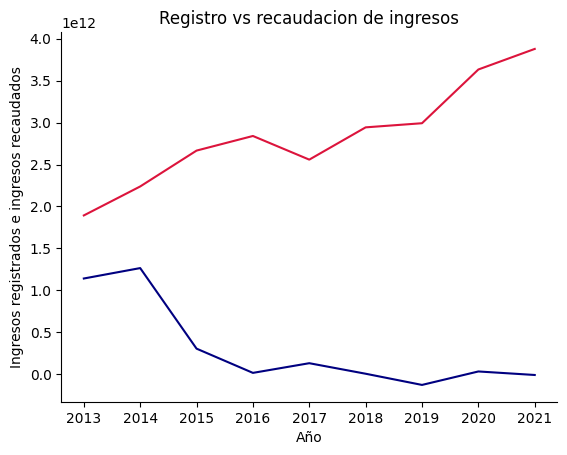

In [9]:
fs.evolucion_temporal(df_agrupado2, "Año", ["VALOR LANÇADO", "VALOR REALIZADO"])

En cuanto a los registros de ingresos, y la recaudación real observamos enormes diferencias. Como hemos comentado anteriormente, el registro de un ingreso contable debe ser igual al ingreso final recibido por la entidad recaudadora. En este caso no se cumple este principio. Vemos que durante todo el período analizado el resgitro de ingresos presenta una tendencia a la baja, mientras que los ingresos realmente recaudados presentan una tendencia al alza. Se están registrando menos ingresos de los que se están recuadando realmente. Más abajo observaremos qué entidades administrativas presentan mayores diferencias en este aspecto, ya que intuimos la existencia de fraude públiico.

## *Ingresos por categoría económica*

Como hemos visto anteriormente los ingresos de Brasil entre 2013 y 2021 se clasifican en diferentes categorías y subcategorías económicas. A continuación realizaremos un análisis de los ingresos recibidos por categoría y después de las subcategorías que contienen las categorías principales. 

Las categorías económicas principales en las que se dividen los ingresos de Brasil son:
- Ingresos corrientes
- Ingresos de capital
- Ingresos corrientes - intrapresupuestarios	
- Ingresos de capital - intrapresupuestarios

Vamos a ir viendo el desglose de los ingresos por categoría ecoómica.

In [8]:
# Ingresos por categoría económica general
categorias_economicas = fs.info_cat(datos_brasil, "CATEGORIA ECONÔMICA").reset_index()
categorias_economicas

,CATEGORIA ECONÔMICA,VALOR PREVISTO ATUALIZADO,VALOR LANÇADO,VALOR REALIZADO,porcentaje recaudado,diferencia_recaudacion
0,Receitas Correntes,"13,549,526,943,206.14","5,377,870,503,243.72","12,909,343,128,909.43",95.28,"7,531,472,625,665.71"
1,Receitas Correntes - intra-orçamentárias,"291,485,025,919.00",0.00,"292,651,790,699.89",100.40,"292,651,790,699.89"
2,Receitas de Capital,"14,485,753,431,206.59","3,813,949.42","12,407,136,680,065.79",85.65,"12,407,132,866,116.37"
3,Receitas de Capital - intra-orçamentárias,"10,808,411,537.00",0.00,"28,250,835,724.33",261.38,"28,250,835,724.33"
4,Sem informação,0.00,"2,812,347,576.39",46.57,Previsión de 0,"-2,812,347,529.82"


Al adentrarnos en las categorías económicas podemos observar diferencias entre los diferentes valores de ingresos. La categoría que más ingresos ha recaudado entre 2013 y 2021 ha sido la de ingresos de capital, seguida por los ingresos corrientes. Estas categorías contienen al fin y al cabo la mayoría de los ingresos presupuestarios. Los ingresos intrapresupuestarios tienen una inferior recaudación. Finalmente tenemos las entradas sin información. 

En cuanto a las previsiones, las categorías con mayor volumen de previsión son asimismo las de inrgesos corriente y de capital, seguidas de los ingresos intrapresupuestarios. De las previsiones, las categorías que han llegado a recaudar la totalidad o más de lo previsto han sido las intrapresupuestarias. Los ingresos corriente y de capital han consguido entre un 80% y un 90% de la recaudación prevista. 

Finalmente, las categorías con más diferencia entre los ingresos registrados y los ingresos recaudados son las intrapresupuestarias, las cuales tienen un ingreso registrado de 0 $. Los ingresos de capital presentan una alta diferencia asimismo, ya que hay un registro bastante pequeño de estos ingresos. Los ingresos corrientes son los que menos diferencia presentan.

In [9]:
cat_ec2 =categorias_economicas[categorias_economicas["CATEGORIA ECONÔMICA"] != "Sem informação"]

A continuación podemos ver de forma detallada, como en un balance, las partidas correspondientes a cada categoría económica.

In [10]:
ingresos_cat = datos_brasil.groupby(["CATEGORIA ECONÔMICA", "ORIGEM RECEITA"])[["VALOR PREVISTO ATUALIZADO", "VALOR LANÇADO","VALOR REALIZADO"]].sum().round(2)
ingresos_cat

VALOR PREVISTO ATUALIZADO  \
CATEGORIA ECONÔMICA                       ORIGEM RECEITA                                                           
Receitas Correntes                        Contribuições                                     7,224,633,087,504.00   
                                          Impostos, Taxas e Contribuições de Melhoria       4,510,202,085,939.00   
                                          Outras Receitas Correntes                           428,858,259,677.00   
                                          Receita Agropecuária                                    230,056,327.00   
                                          Receita Industrial                                   18,734,738,626.00   
                                          Receita Patrimonial                                 922,303,174,656.03   
                                          Receita de Serviços                                 439,803,742,964.11   
                                          Receitas Correntes - a classificar                                0.00   
                                          Transferências Correntes                              4,761,797,513.00   
Receitas Correntes - intra-orçamentárias  Contribuições                                       190,615,572,904.00   
                                          Impostos, Taxas e Contribuições de Melhoria               8,679,239.00   
                                          Outras Receitas Correntes                            98,478,861,468.00   
                                          Receita Industrial                                    1,381,739,049.00   
                                          Receita Patrimonial                                      45,380,166.00   
                                          Receita de Serviços                                     954,793,093.00   
Receitas de Capital                       Alienação de Bens                                    69,459,904,322.00   
                                          Amortizações de Empréstimos                         468,392,937,016.00   
                                          Operações de Crédito                             12,776,862,878,819.19   
                                          Outras Receitas de Capital                        1,169,948,076,486.00   
                                          Transferências de Capital                             1,089,634,563.40   
Receitas de Capital - intra-orçamentárias Alienação de Bens                                                 0.00   
                                          Operações de Crédito                                 10,808,411,537.00   
Sem informação                            Sem informação                                                    0.00   

                                                                                             VALOR LANÇADO  \
CATEGORIA ECONÔMICA                       ORIGEM RECEITA                                                     
Receitas Correntes                        Contribuições                               3,220,620,507,720.18   
                                          Impostos, Taxas e Contribuições de Melhoria 2,020,808,903,486.62   
                                          Outras Receitas Correntes                     136,055,962,948.35   
                                          Receita Agropecuária                                        0.00   
                                          Receita Industrial                                          0.00   
                                          Receita Patrimonial                               380,086,767.00   
                                          Receita de Serviços                                         0.00   
                                          Receitas Correntes - a classificar                  5,042,321.57   
                                          Transferências Correntes                    

Realizaremos un análisis en detalle de los origenes de los ingresos dentro de cada categoría económica.

### *Ingresos corrientes*

Como hemos visto en la preview del balance anterior, los ingresos corrientes se componen de los siguientes orígenes:

In [11]:
pd.options.display.float_format = '{:,.2f}'.format

In [12]:
# Ingresos corrientes
ingresos_corrientes2 = datos_brasil[datos_brasil["CATEGORIA ECONÔMICA"] == "Receitas Correntes"]
ingresos_corrientes_origen = fs.info_cat(ingresos_corrientes2, "ORIGEM RECEITA").reset_index()
ingresos_corrientes_origen

,ORIGEM RECEITA,VALOR PREVISTO ATUALIZADO,VALOR LANÇADO,VALOR REALIZADO,porcentaje recaudado,diferencia_recaudacion
0,Contribuições,"7,224,633,087,504.00","3,220,620,507,720.18","6,877,089,890,534.66",95.19,"3,656,469,382,814.48"
1,"Impostos, Taxas e Contribuições de Melhoria","4,510,202,085,939.00","2,020,808,903,486.62","4,287,304,858,124.57",95.06,"2,266,495,954,637.95"
2,Outras Receitas Correntes,"428,858,259,677.00","136,055,962,948.35","371,983,192,854.63",86.74,"235,927,229,906.28"
3,Receita Agropecuária,"230,056,327.00",0.00,"212,916,430.85",92.55,"212,916,430.85"
4,Receita Industrial,"18,734,738,626.00",0.00,"17,941,345,587.65",95.77,"17,941,345,587.65"
5,Receita Patrimonial,"922,303,174,656.03","380,086,767.00","957,242,133,633.19",103.79,"956,862,046,866.19"
6,Receita de Serviços,"439,803,742,964.11",0.00,"409,260,662,661.21",93.06,"409,260,662,661.21"
7,Receitas Correntes - a classificar,0.00,"5,042,321.57","-15,471,989,712.32",Previsión de 0,"-15,477,032,033.89"
8,Transferências Correntes,"4,761,797,513.00",0.00,"3,780,118,794.99",79.38,"3,780,118,794.99"


Graficamos los ingresos corrientes

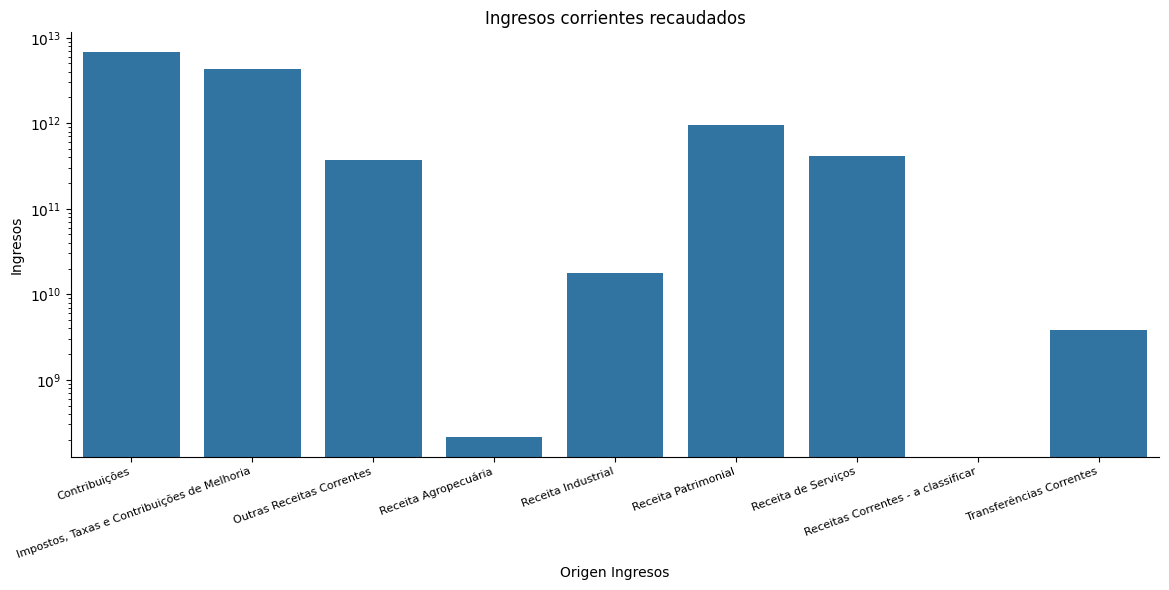

In [9]:
fs.grafico_cat_economia(ingresos_corrientes_origen, "ORIGEM RECEITA", "VALOR REALIZADO")

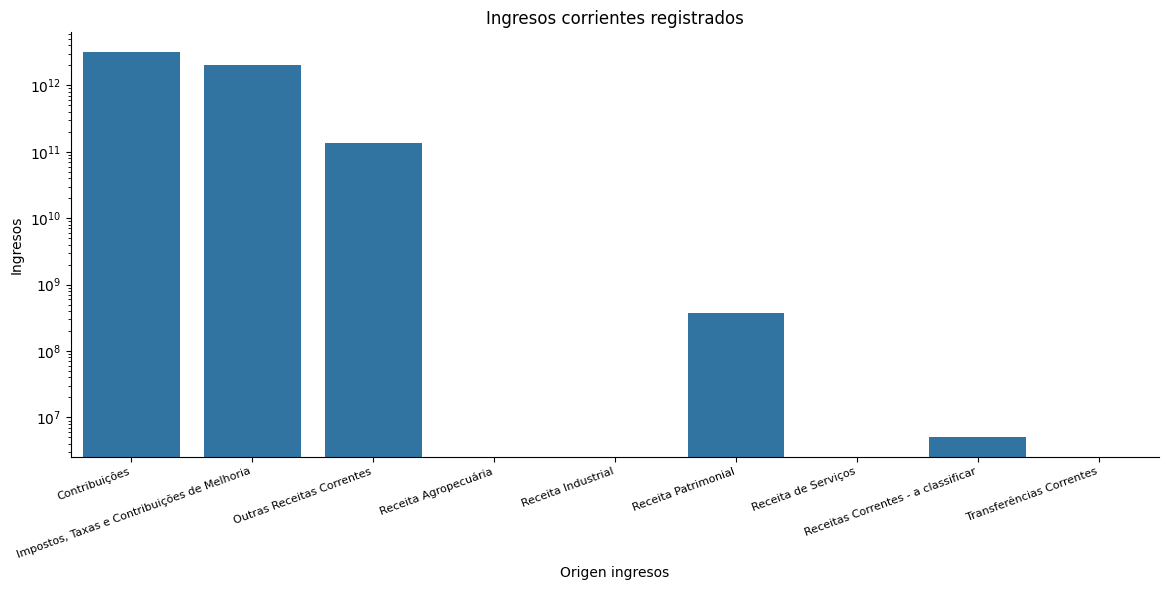

In [13]:
fs.grafico_cat_economia(ingresos_corrientes_origen, "ORIGEM RECEITA", "VALOR LANÇADO")

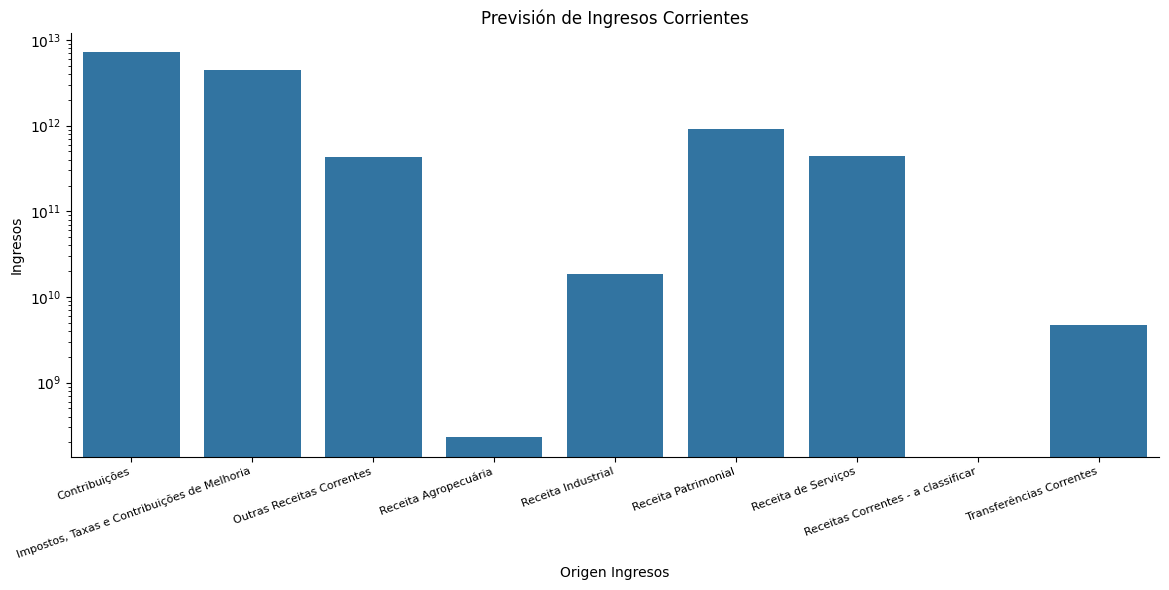

In [14]:
fs.grafico_cat_economia(ingresos_corrientes_origen, "ORIGEM RECEITA", "VALOR PREVISTO ATUALIZADO")

Dentro de los ingresos corrientes nos encontramos que la principal fuente de estos ingresos son las contribuciones y los ingresos fiscales, los cuales se componen por los impuestos, tasas y contribuciones de mejoría. Estas dos categorías son asimismo las que han recibido una mayor previsión de ingresos. Al fin y al cabo se componen de los ingresos procedentes de la recudación de impuestos, tasa y contribuciones, así como de las contribuciones sociales. Estos son los principales ingresos de una economía por norma general. Como es de esperar, la mayor diferencia entre lo recaudado y lo registrado es superior en estas categorías. 

Los orígenes con menor volumen de ingresos son las rentas agrarias, las cuales proceden de la actividad o explotación agraria de origen vegetal o animal.La previsión de estsos ingresos es bastante baja asimismo. 

Nos encontramos que hay un registro nulo en las rentas agropecuarias, las rentas industriales, y las rentas de servicios. 

In [17]:
negativos_corrientes = datos_brasil[datos_brasil["ORIGEM RECEITA"] == "Receitas Correntes - a classificar"]
neg = negativos_corrientes[negativos_corrientes["VALOR REALIZADO"] < 0]
neg.head(2)

,CÓDIGO ÓRGÃO SUPERIOR,NOME ÓRGÃO SUPERIOR,CÓDIGO ÓRGÃO,NOME ÓRGÃO,CÓDIGO UNIDADE GESTORA,NOME UNIDADE GESTORA,CATEGORIA ECONÔMICA,ORIGEM RECEITA,ESPÉCIE RECEITA,DETALHAMENTO,VALOR PREVISTO ATUALIZADO,VALOR LANÇADO,VALOR REALIZADO,PERCENTUAL REALIZADO,DATA LANÇAMENTO,ANO EXERCÍCIO
3800,35000,Ministério das Relações Exteriores,35000,Ministério das Relações Exteriores - Unidades ...,240999,MRE - DIFERENCA CAMBIAL,Receitas Correntes,Receitas Correntes - a classificar,Receitas Correntes - a classificar,Receitas Correntes - a classificar,0.00,0.00,"-131,512.98",0.00,2013-12-31,2013
8323,35000,Ministério das Relações Exteriores,35000,Ministério das Relações Exteriores - Unidades ...,240999,MRE - DIFERENCA CAMBIAL,Receitas Correntes,Receitas Correntes - a classificar,Receitas Correntes - a classificar,Receitas Correntes - a classificar,0.00,0.00,"-59,521.93",0.00,2014-12-31,2014


#### *Ingresos corrientes - intrapresupuestarios*

In [3]:
ingresos_corrientes_intrapresupuestarios = datos_brasil[datos_brasil["CATEGORIA ECONÔMICA"] == "Receitas Correntes - intra-orçamentárias"]
fs.info_cat(ingresos_corrientes_intrapresupuestarios, "ORIGEM RECEITA")

,VALOR PREVISTO ATUALIZADO,VALOR LANÇADO,VALOR REALIZADO,porcentaje recaudado,diferencia_recaudacion
ORIGEM RECEITA,,,,,
Contribuições,1.906156e+11,0.0,1.665143e+11,87.36,1.665143e+11
"Impostos, Taxas e Contribuições de Melhoria",8.679239e+06,0.0,-1.214788e+07,-139.96,-1.214788e+07
Outras Receitas Correntes,9.847886e+10,0.0,1.235927e+11,125.50,1.235927e+11
Receita Industrial,1.381739e+09,0.0,1.314822e+09,95.16,1.314822e+09
Receita Patrimonial,4.538017e+07,0.0,9.274581e+07,204.38,9.274581e+07
Receita de Serviços,9.547931e+08,0.0,1.149372e+09,120.38,1.149372e+09


c:\Users\gabri\HackIO\Proyecto\Proyecto2-Insights-Brasil\src\funciones_soporte.py:161: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x = eje_x,


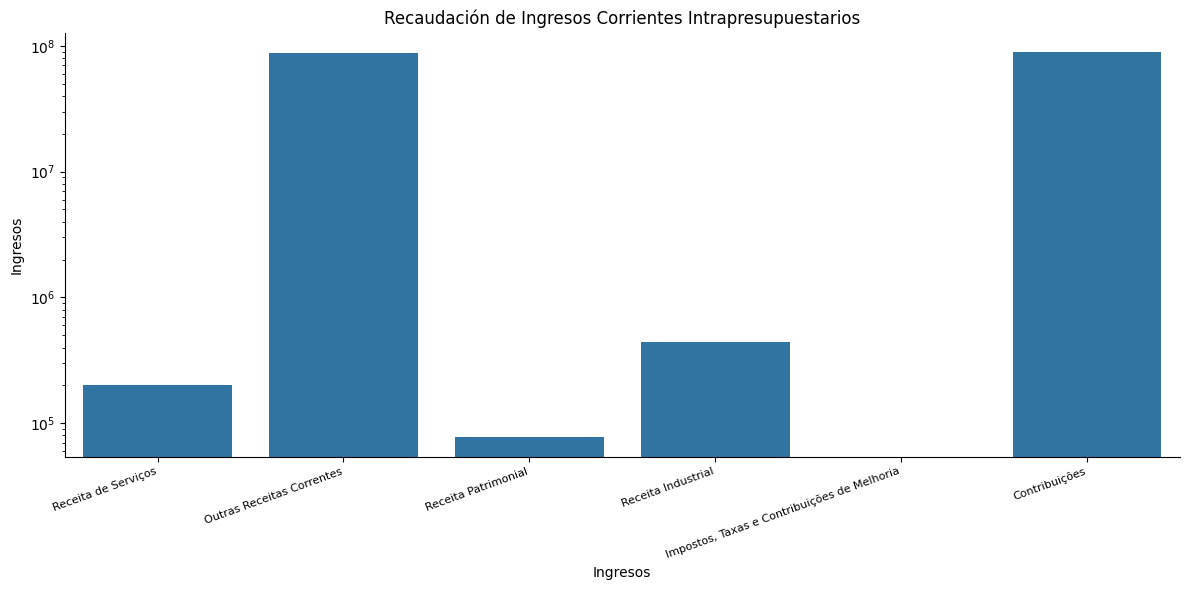

In [4]:
fs.grafico_cat_economia(ingresos_corrientes_intrapresupuestarios, "ORIGEM RECEITA", "VALOR REALIZADO")

c:\Users\gabri\HackIO\Proyecto\Proyecto2-Insights-Brasil\src\funciones_soporte.py:161: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x = eje_x,


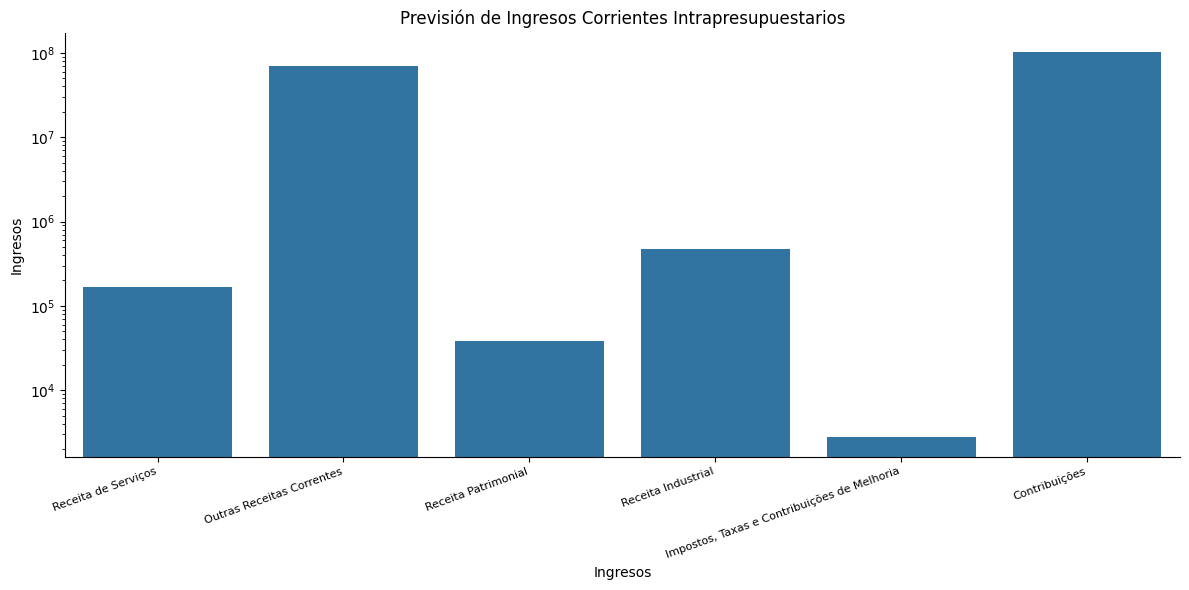

In [5]:
fs.grafico_cat_economia(ingresos_corrientes_intrapresupuestarios, "ORIGEM RECEITA", "VALOR PREVISTO ATUALIZADO")

#### *Ingresos de capital*

In [6]:
ingresos_capital = datos_brasil[datos_brasil["CATEGORIA ECONÔMICA"] == "Receitas de Capital"]
fs.info_cat(ingresos_capital, "ORIGEM RECEITA")

,VALOR PREVISTO ATUALIZADO,VALOR LANÇADO,VALOR REALIZADO,porcentaje recaudado,diferencia_recaudacion
ORIGEM RECEITA,,,,,
Alienação de Bens,6.945990e+10,0.00,2.692501e+10,38.76,2.692501e+10
Amortizações de Empréstimos,4.683929e+11,0.00,7.990345e+11,170.59,7.990345e+11
Operações de Crédito,1.277686e+13,3813949.42,9.857798e+12,77.15,9.857794e+12
Outras Receitas de Capital,1.169948e+12,0.00,1.722901e+12,147.26,1.722901e+12
Transferências de Capital,1.089635e+09,0.00,4.786975e+08,43.93,4.786975e+08


c:\Users\gabri\HackIO\Proyecto\Proyecto2-Insights-Brasil\src\funciones_soporte.py:161: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x = eje_x,


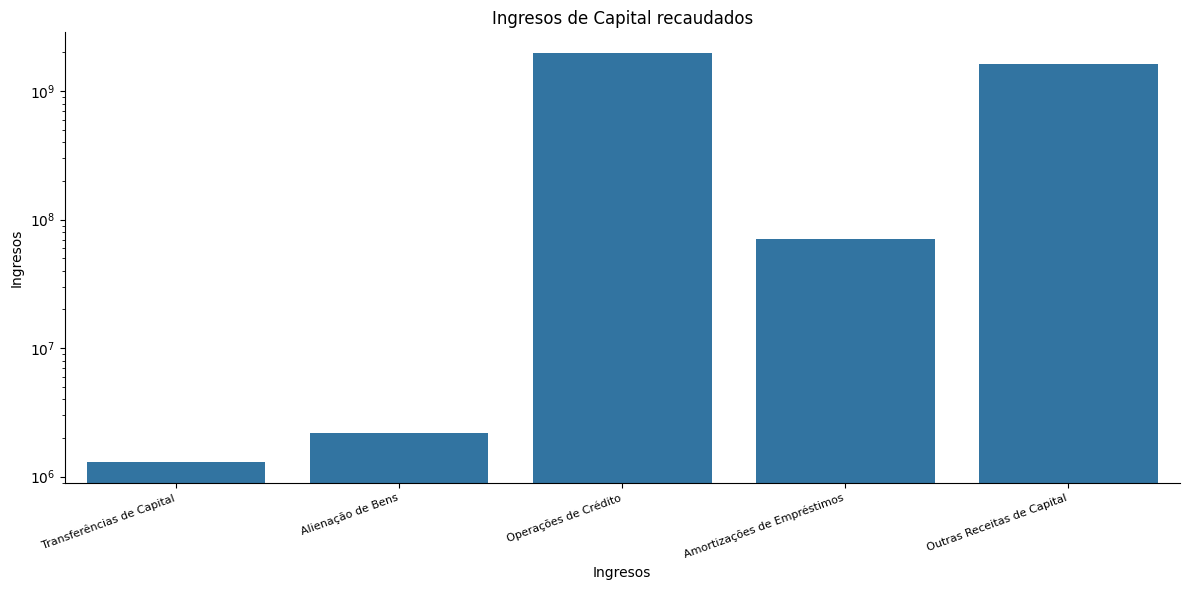

In [7]:
fs.grafico_cat_economia(ingresos_capital, "ORIGEM RECEITA", "VALOR REALIZADO")

c:\Users\gabri\HackIO\Proyecto\Proyecto2-Insights-Brasil\src\funciones_soporte.py:161: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x = eje_x,


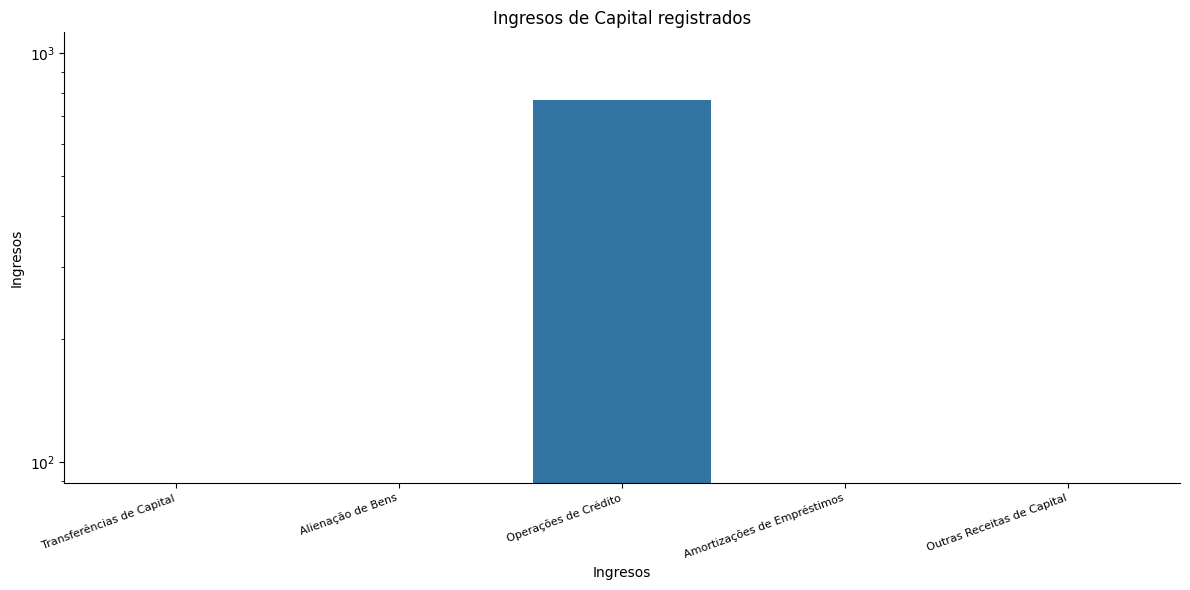

In [8]:
fs.grafico_cat_economia(ingresos_capital, "ORIGEM RECEITA", "VALOR LANÇADO")

c:\Users\gabri\HackIO\Proyecto\Proyecto2-Insights-Brasil\src\funciones_soporte.py:161: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x = eje_x,


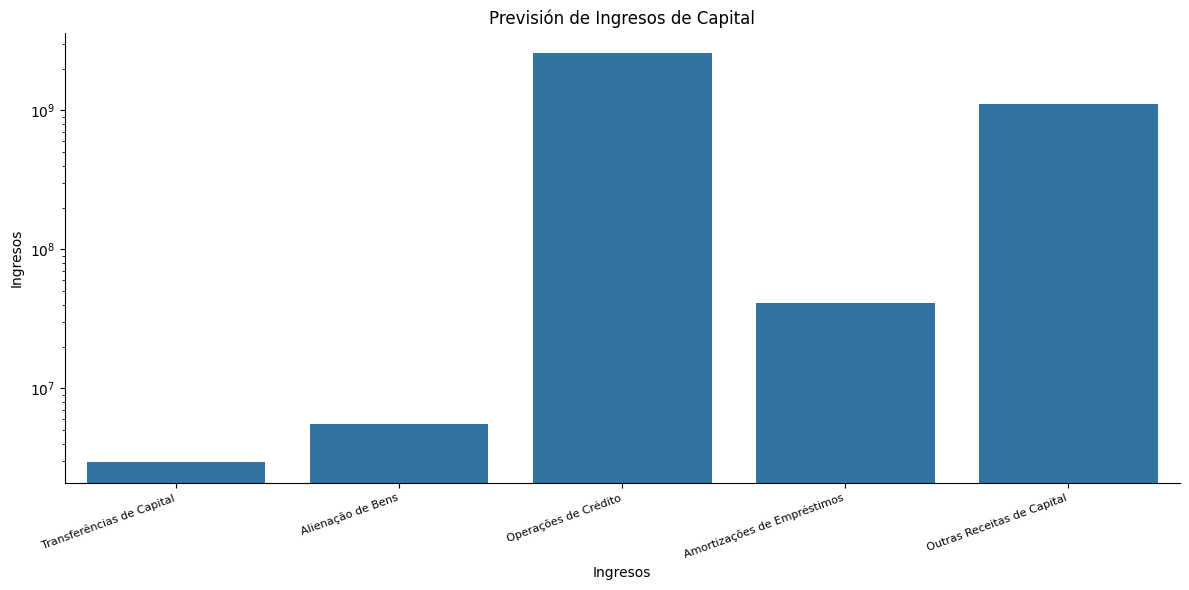

In [9]:
fs.grafico_cat_economia(ingresos_capital, "ORIGEM RECEITA", "VALOR PREVISTO ATUALIZADO")

#### *Ingresos de capital - intrapresupuestarios*

In [10]:
ingresos_capital_intrapresupuestarios = datos_brasil[datos_brasil["CATEGORIA ECONÔMICA"] == "Receitas de Capital - intra-orçamentárias"]
fs.info_cat(ingresos_capital_intrapresupuestarios, "ORIGEM RECEITA")

,VALOR PREVISTO ATUALIZADO,VALOR LANÇADO,VALOR REALIZADO,porcentaje recaudado,diferencia_recaudacion
ORIGEM RECEITA,,,,,
Alienação de Bens,0.000000e+00,0.0,1.088867e+08,Previsión de 0,1.088867e+08
Operações de Crédito,1.080841e+10,0.0,2.814195e+10,260.37,2.814195e+10


c:\Users\gabri\HackIO\Proyecto\Proyecto2-Insights-Brasil\src\funciones_soporte.py:161: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x = eje_x,


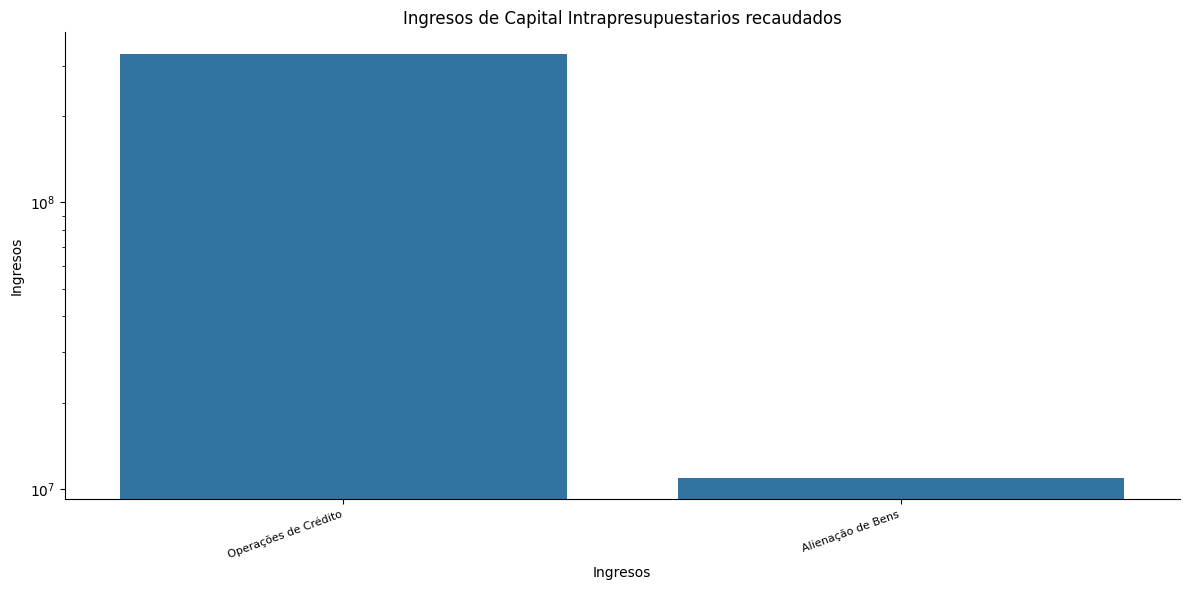

In [11]:
fs.grafico_cat_economia(ingresos_capital_intrapresupuestarios, "ORIGEM RECEITA", "VALOR REALIZADO")

c:\Users\gabri\HackIO\Proyecto\Proyecto2-Insights-Brasil\src\funciones_soporte.py:161: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x = eje_x,


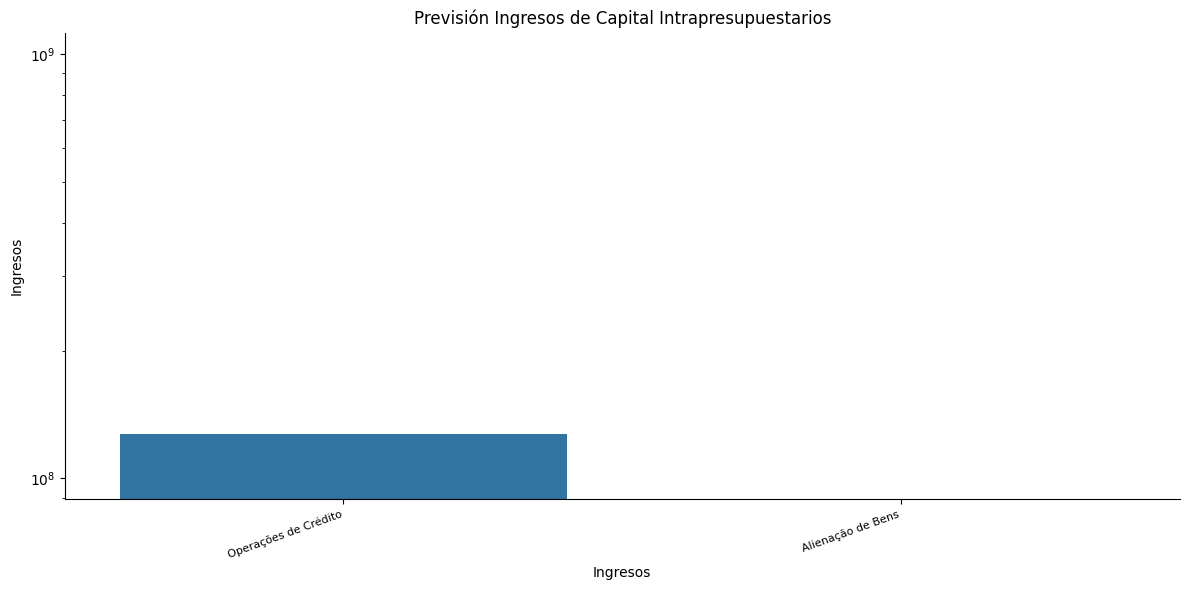

In [13]:
fs.grafico_cat_economia(ingresos_capital_intrapresupuestarios, "ORIGEM RECEITA", "VALOR PREVISTO ATUALIZADO")

#### *Entradas sin información*

In [37]:
ingresos_sin_info = datos_brasil[datos_brasil["ORIGEM RECEITA"] == "Sem informação"]
fs.info_cat(ingresos_sin_info, "ESPÉCIE RECEITA")

,VALOR PREVISTO ATUALIZADO,VALOR LANÇADO,VALOR REALIZADO,porcentaje recaudado,diferencia_recaudacion
ESPÉCIE RECEITA,,,,,
Sem informação,0.00,"2,812,347,576.39",46.57,Previsión de 0,"-2,812,347,529.82"


## Análisis por entidad gubernamental

In [7]:
pd.options.display.float_format = '{:,.2f}'.format

In [8]:
# Ingresos por entidad gubernamental
entidad_gub = fs.info_cat(datos_brasil, "NOME ÓRGÃO SUPERIOR").reset_index()
entidad_gub

,NOME ÓRGÃO SUPERIOR,VALOR PREVISTO ATUALIZADO,VALOR LANÇADO,VALOR REALIZADO,porcentaje recaudado,diferencia_recaudacion
0,Advocacia-Geral da União,"3,726,053,651.00",0.00,"334,962,977.49",8.99,"334,962,977.49"
1,Controladoria-Geral da União,"740,692,856.00",0.00,"7,555,037.45",1.02,"7,555,037.45"
2,"Ministério da Agricultura, Pecuária e Abastec","87,492,532,893.00",0.00,"56,433,953,381.26",64.50,"56,433,953,381.26"
3,Ministério da Cidadania,"43,958,882,249.00",0.00,"5,143,388,129.18",11.70,"5,143,388,129.18"
4,"Ministério da Ciência, Tecnologia, Inovações","62,254,372,476.31","79,230.26","34,791,131,893.58",55.89,"34,791,052,663.32"
5,Ministério da Defesa,"198,522,792,044.00",0.00,"104,665,740,965.96",52.72,"104,665,740,965.96"
6,Ministério da Economia,"26,486,420,136,019.00","5,367,369,003,775.87","24,709,753,338,137.24",93.29,"19,342,384,334,361.37"
7,Ministério da Educação,"609,585,887,826.00","3,516,427.16","221,589,353,642.78",36.35,"221,585,837,215.62"
8,Ministério da Infraestrutura,"119,972,882,836.00",0.00,"136,206,900,382.34",113.53,"136,206,900,382.34"
9,Ministério da Justiça e Segurança Pública,"36,304,805,355.02",0.00,"25,219,154,299.03",69.47,"25,219,154,299.03"


A continuación vamos a realizar un análisis detallado de los ingresos obtenidos por cada ministerio.

### *Procuraduría General de la Unión (Advocacia-Geral da União)*

In [9]:
# Vemos la información general del ministerio, sus ingresos y las unidades ministeriales que lo componen
fs.info_ministerio(datos_brasil, "Advocacia-Geral da União")

Los órganos de los que se compone el Advocacia-Geral da União son: ['Advocacia-Geral da União - Unidades com vínculo direto']
Las unidades gestoras que componen los órganos del Advocacia-Geral da União son: ['COORD. GERAL DE ORC. FIN. E ANAL. CONT. - AGU']
Los ingresos entre 2013 y 2025 del Advocacia-Geral da União son: 



,VALOR PREVISTO ATUALIZADO,VALOR LANÇADO,VALOR REALIZADO,porcentaje recaudado,diferencia_recaudacion
NOME ÓRGÃO SUPERIOR,,,,,
Advocacia-Geral da União,"3,726,053,651.00",0.00,"334,962,977.49",8.99,"334,962,977.49"


In [10]:
# Vemos la evolución temporal de los ingresos del ministerio
temporal_advocacia = fs.info_ministerio(datos_brasil, "Advocacia-Geral da União")
temporal_advocacia

,VALOR LANÇADO,VALOR REALIZADO
ANO EXERCÍCIO,,
2013,0.00,"79,852,984.21"
2014,0.00,"81,496,388.31"
2015,0.00,"101,197,295.07"
2016,0.00,"45,835,844.35"
2017,0.00,"20,994,103.08"
2018,0.00,"4,429,290.22"
2019,0.00,"1,157,072.25"
2020,0.00,-0.00
2021,0.00,0.00


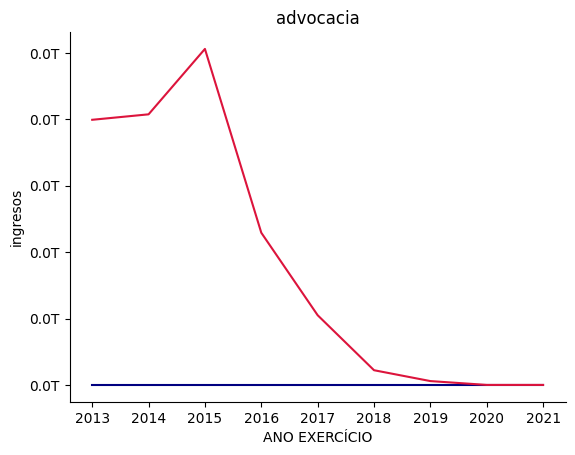

In [11]:
fs.evolucion_temporal(temporal_advocacia, "ANO EXERCÍCIO",["VALOR LANÇADO", "VALOR REALIZADO"])

La Procuraduría General de la Unión ha recaudado un total de 334.962.977,49 $ entre 2013 y 2021, representando esto un 8,99 % de lo previsto a recaudar. Asimismo nos encontramos que ha registrado un total de 0 dólares de lo recaudado finalmente. El año en el que más ha recaudado ha sido 2015, y a partir de ese año la recaudación se ve reducida hasta llegar a los 0 dólares en 2020. 

### *Contraloría General de la Unión (Controladoria-Geral da União)*

In [11]:
# Vemos la información general del ministerio, sus ingresos y las unidades ministeriales que lo componen
fs.info_ministerio(datos_brasil, "Controladoria-Geral da União")

Los órganos de los que se compone el Controladoria-Geral da União son: ['Controladoria-Geral da União'
 'Controladoria-Geral da União - Unidades com vínculo direto']
Las unidades gestoras que componen los órganos del Controladoria-Geral da União son: ['DIRETORIA DE GESTAO INTERNA/SE/CGU' 'DIRETORIA DE GESTAO INTERNA(CGU)']
Los ingresos entre 2013 y 2025 del Controladoria-Geral da União son: 



,VALOR PREVISTO ATUALIZADO,VALOR LANÇADO,VALOR REALIZADO,porcentaje recaudado,diferencia_recaudacion
NOME ÓRGÃO SUPERIOR,,,,,
Controladoria-Geral da União,"740,692,856.00",0.00,"7,555,037.45",1.02,"7,555,037.45"


In [12]:
temporal_controladoria = fs.info_ministerio(datos_brasil, "Controladoria-Geral da União")
temporal_controladoria

,VALOR LANÇADO,VALOR REALIZADO
ANO EXERCÍCIO,,
2013,0.00,"1,250,774.97"
2014,0.00,"266,947.18"
2015,0.00,"884,447.32"
2016,0.00,"1,277,912.59"
2017,0.00,"3,863,278.55"
2018,0.00,"11,676.84"
2020,0.00,0.00
2021,0.00,0.00


In [8]:
# Vemos la información sobre su composición.
fs.info_ministerio(datos_brasil, "Controladoria-Geral da União")

,,VALOR PREVISTO ATUALIZADO,VALOR LANÇADO,VALOR REALIZADO,porcentaje_recaudacion
NOME ÓRGÃO,NOME UNIDADE GESTORA,,,,
Controladoria-Geral da União,DIRETORIA DE GESTAO INTERNA/SE/CGU,"19,176,752.00",0.00,"4,346,194.92",22.66
Controladoria-Geral da União - Unidades com vínculo direto,DIRETORIA DE GESTAO INTERNA(CGU),"721,516,104.00",0.00,"3,208,842.53",0.44


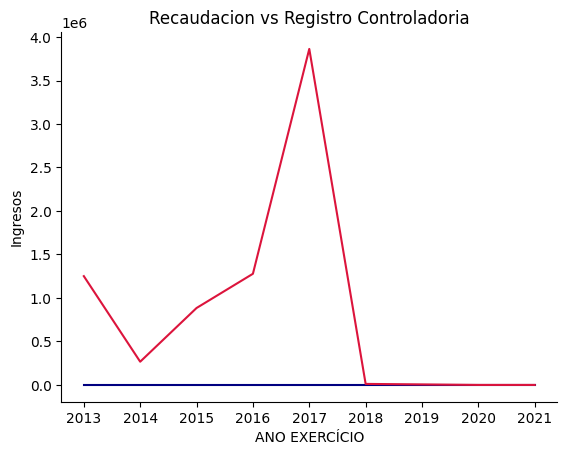

In [11]:
fs.evolucion_temporal(temporal_controladoria, "ANO EXERCÍCIO",["VALOR LANÇADO", "VALOR REALIZADO"])

La Contraloría General de la Unión ha recaudado un total de 740.692.856 $ entre 2013 y 2021, representando esto un 1,02 % de lo previsto a recaudar. Asimismo nos encontramos que ha registrado un total de 0 dólares de lo recaudado finalmente. El año en el que más ha recaudado ha sido 2017, año a partir del cual los ingresos de este ministerio se ven completamente reducidos a cero.

### *Ministerio de Agricultura, Ganadería y Abastecimiento (Ministério da Agricultura, Pecuária e Abastec)* 🐤

In [5]:
# Vemos la información general del ministerio, sus ingresos y las unidades ministeriales que lo componen
fs.info_ministerio(datos_brasil, "Ministério da Agricultura, Pecuária e Abastec")

Los órganos de los que se compone el Ministério da Agricultura, Pecuária e Abastec son: ['Empresa Brasileira de Pesquisa Agropecuária'
 'Ministério da Agricultura, Pecuária e Abastecimento - Unidades com vínculo direto'
 'Companhia Nacional de Abastecimento' 'Serviço Florestal Brasileiro'
 'Instituto Nacional de Colonização e Reforma Agrária'
 'Fundo de Defesa da Economia Cafeeira'
 'Fundo de Terras e da Reforma Agrária'
 'Secretaria Especial de Agricultura Familiar e do Desenvolvimento Agrário']
Las unidades gestoras que componen los órganos del Ministério da Agricultura, Pecuária e Abastec son: ['EMBRAPA-SETORIAL' 'COORD.-GERAL DE ORCAMENTO E FINANCAS-MAPA'
 'COMPANHIA NACIONAL DE ABASTECIMENTO'
 'SETORIAL PROG.ORCAMENTARIA E FINANCEIRA-SFB'
 'DPTO. DE ADMINISTRACAO FINANCEIRA-DAF - INCRA'
 'FUNDO DE DEFESA DA ECON.CAFEEIRA/FUNCAFE/SPA' 'CREDITO FUNDIARIO'
 'SEC.ESPEC.DE AGRIC.FAMIL.E DO DESENV.AGRARIO'
 'SECRETARIA ESPECIAL DE AQUICULTURA E PESCA/PR'
 'COORDENACAO-GERAL DO FUNDO DE 

,VALOR PREVISTO ATUALIZADO,VALOR LANÇADO,VALOR REALIZADO,porcentaje recaudado,diferencia_recaudacion
NOME ÓRGÃO SUPERIOR,,,,,
"Ministério da Agricultura, Pecuária e Abastec","87,492,532,893.00",0.00,"56,433,953,381.26",64.50,"56,433,953,381.26"


In [6]:
# Vemos la información temporal sobre el ministerio
temporal_agricultura = fs.info_ministerio(datos_brasil, "Ministério da Agricultura, Pecuária e Abastec")
temporal_agricultura

,VALOR LANÇADO,VALOR REALIZADO
ANO EXERCÍCIO,,
2013,0.00,"6,302,036,557.43"
2014,0.00,"4,800,117,367.13"
2015,0.00,"6,200,536,186.78"
2016,0.00,"6,245,684,227.04"
2017,0.00,"6,981,982,293.88"
2018,0.00,"6,059,488,240.06"
2019,0.00,"6,871,989,141.97"
2020,0.00,"6,955,897,667.06"
2021,0.00,"6,016,221,699.91"


In [7]:
# Vemos la información sobre su composición.
fs.info_ministerio(datos_brasil, "Ministério da Agricultura, Pecuária e Abastec")

VALOR PREVISTO ATUALIZADO  \
NOME ÓRGÃO                                         NOME UNIDADE GESTORA                                                       
Companhia Nacional de Abastecimento                COMPANHIA NACIONAL DE ABASTECIMENTO                    16,181,320,395.00   
Empresa Brasileira de Pesquisa Agropecuária        EMBRAPA-SETORIAL                                        4,543,365,404.00   
Fundo de Defesa da Economia Cafeeira               FUNDO DE DEFESA DA ECON.CAFEEIRA/FUNCAFE/SPA           44,763,486,199.00   
Fundo de Terras e da Reforma Agrária               COORDENACAO-GERAL DO FUNDO DE TERRAS                                0.00   
                                                   CREDITO FUNDIARIO                                         795,133,061.00   
Instituto Nacional de Colonização e Reforma Agr... DPTO. DE ADMINISTRACAO FINANCEIRA-DAF - INCRA          14,644,570,444.00   
Ministério da Agricultura, Pecuária e Abastecim... COORD.-GERAL DE ORCAMENTO E FINANCAS-MAPA               6,059,471,621.00   
                                                   SECRETARIA ESPECIAL DE AQUICULTURA E PESCA/PR               5,327,629.00   
Secretaria Especial de Agricultura Familiar e d... SEC.ESPEC.DE AGRIC.FAMIL.E DO DESENV.AGRARIO               98,336,469.00   
Serviço Florestal Brasileiro                       SETORIAL PROG.ORCAMENTARIA E FINANCEIRA-SFB               401,521,671.00   

                                                                                                  VALOR LANÇADO  \
NOME ÓRGÃO                                         NOME UNIDADE GESTORA                                           
Companhia Nacional de Abastecimento                COMPANHIA NACIONAL DE ABASTECIMENTO                     0.00   
Empresa Brasileira de Pesquisa Agropecuária        EMBRAPA-SETORIAL                                        0.00   
Fundo de Defesa da Economia Cafeeira               FUNDO DE DEFESA DA ECON.CAFEEIRA/FUNCAFE/SPA            0.00   
Fundo de Terras e da Reforma Agrária               COORDENACAO-GERAL DO FUNDO DE TERRAS                    0.00   
                                                   CREDITO FUNDIARIO                                       0.00   
Instituto Nacional de Colonização e Reforma Agr... DPTO. DE ADMINISTRACAO FINANCEIRA-DAF - INCRA           0.00   
Ministério da Agricultura, Pecuária e Abastecim... COORD.-GERAL DE ORCAMENTO E FINANCAS-MAPA               0.00   
                                                   SECRETARIA ESPECIAL DE AQUICULTURA E PESCA/PR           0.00   
Secretaria Especial de Agricultura Familiar e d... SEC.ESPEC.DE AGRIC.FAMIL.E DO DESENV.AGRARIO            0.00   
Serviço Florestal Brasileiro                       SETORIAL PROG.ORCAMENTARIA E FINANCEIRA-SFB             0.00   

                                                                                                   VALOR REALIZADO  \
NOME ÓRGÃO                                         NOME UNIDADE GESTORA                                              
Companhia Nacional de Abastecimento                COMPANHIA NACIONAL DE ABASTECIMENTO            1,157,437,895.80   
Empresa Brasileira de Pesquisa Agropecuária        EMBRAPA-SETORIAL                                 410,143,266.07   
Fundo de Defesa da Economia Cafeeira               FUNDO DE DEFESA DA ECON.CAFEEIRA/FUNCAFE/SPA  35,393,834,816.34   
Fundo de Terras e da Reforma Agrária               COORDENACAO-GERAL DO FUNDO DE TERRAS              89,215,763.39   
                                                   CREDITO FUNDIARIO                              1,614,404,425.39   
Instituto Nacional de Colonização e Reforma Agr... DPTO. DE ADMINISTRACAO FINANCEIRA-DAF - INCRA 15,239,509,246.71   
Ministério da Agricultura, Pecuária e Abastecim... COORD.-GERAL DE ORCAMENTO E FINANCAS-MAPA      2,343,661,823.46   
                                                   SECRETARIA ESPECIAL DE AQUICULTURA E PESCA/PR      3,651,982.69   
Secretaria E

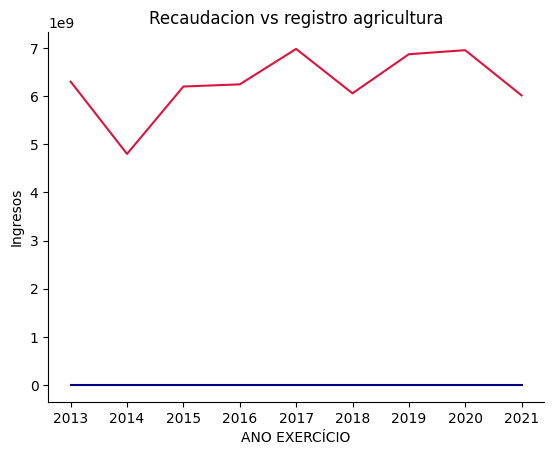

In [14]:
fs.evolucion_temporal(temporal_agricultura, "ANO EXERCÍCIO",["VALOR LANÇADO", "VALOR REALIZADO"])

### *Ministerio de los Derechos Humanos y la Ciudadanía (Ministério dos Direitos Humanos e da Cidadania)* 👪

In [5]:
# Vemos la información general del ministerio, sus ingresos y las unidades ministeriales que lo componen
fs.info_ministerio(datos_brasil, "Ministério da Cidadania")

Los órganos de los que se compone el Ministério da Cidadania son: ['Ministério da Cidadania - Unidades com vínculo direto'
 'Fundo Nacional de Assistência Social']
Las unidades gestoras que componen los órganos del Ministério da Cidadania son: ['COORD.GERAL DE PLAN. ORC. FIN. E CONTAB./MINC'
 'DEPARTAMENTO DE GESTAO INTERNA' 'SETORIAL DE ORCAMENTO E FINANCAS/MC'
 'FUNDO NACIONAL DE ASSISTENCIA SOCIAL'
 'SETORIAL ORCAMENTARIA E FINANCEIRA - (ME)']
Los ingresos entre 2013 y 2025 del Ministério da Cidadania son: 



,VALOR PREVISTO ATUALIZADO,VALOR LANÇADO,VALOR REALIZADO,porcentaje recaudado,diferencia_recaudacion
NOME ÓRGÃO SUPERIOR,,,,,
Ministério da Cidadania,"43,958,882,249.00",0.00,"5,143,388,129.18",11.70,"5,143,388,129.18"


In [6]:
# Vemos la información temporal sobre el ministerio
temporal_ciudadania = fs.info_ministerio(datos_brasil, "Ministério da Cidadania")
temporal_ciudadania

,VALOR LANÇADO,VALOR REALIZADO
ANO EXERCÍCIO,,
2013,0.00,"464,236,471.19"
2014,0.00,"462,826,578.28"
2015,0.00,"426,955,944.03"
2016,0.00,"420,492,793.15"
2017,0.00,"512,550,755.06"
2018,0.00,"136,807,250.43"
2019,0.00,"378,863,461.42"
2020,0.00,"650,773,921.11"
2021,0.00,"1,689,880,954.51"


In [11]:
# Vemos la información sobre su composición.
fs.info_ministerio(datos_brasil, "Ministério da Cidadania")

VALOR PREVISTO ATUALIZADO  \
NOME ÓRGÃO                                         NOME UNIDADE GESTORA                                                       
Fundo Nacional de Assistência Social               FUNDO NACIONAL DE ASSISTENCIA SOCIAL                   31,243,675,564.00   
Ministério da Cidadania - Unidades com vínculo ... COORD.GERAL DE PLAN. ORC. FIN. E CONTAB./MINC                 836,897.00   
                                                   DEPARTAMENTO DE GESTAO INTERNA                            391,529,812.00   
                                                   SETORIAL DE ORCAMENTO E FINANCAS/MC                    10,034,198,132.00   
                                                   SETORIAL ORCAMENTARIA E FINANCEIRA - (ME)               2,288,641,844.00   

                                                                                                  VALOR LANÇADO  \
NOME ÓRGÃO                                         NOME UNIDADE GESTORA                                           
Fundo Nacional de Assistência Social               FUNDO NACIONAL DE ASSISTENCIA SOCIAL                    0.00   
Ministério da Cidadania - Unidades com vínculo ... COORD.GERAL DE PLAN. ORC. FIN. E CONTAB./MINC           0.00   
                                                   DEPARTAMENTO DE GESTAO INTERNA                          0.00   
                                                   SETORIAL DE ORCAMENTO E FINANCAS/MC                     0.00   
                                                   SETORIAL ORCAMENTARIA E FINANCEIRA - (ME)               0.00   

                                                                                                  VALOR REALIZADO  \
NOME ÓRGÃO                                         NOME UNIDADE GESTORA                                             
Fundo Nacional de Assistência Social               FUNDO NACIONAL DE ASSISTENCIA SOCIAL            384,991,312.66   
Ministério da Cidadania - Unidades com vínculo ... COORD.GERAL DE PLAN. ORC. FIN. E CONTAB./MINC    61,200,344.85   
                                                   DEPARTAMENTO DE GESTAO INTERNA                  119,978,663.21   
                                                   SETORIAL DE ORCAMENTO E FINANCAS/MC           4,011,140,623.79   
                                                   SETORIAL ORCAMENTARIA E FINANCEIRA - (ME)       566,077,184.67   

                                                                                                  porcentaje_recaudacion  
NOME ÓRGÃO                                         NOME UNIDADE GESTORA                                                   
Fundo Nacional de Assistência Social               FUNDO NACIONAL DE ASSISTENCIA SOCIAL                             1.23  
Ministério da Cidadania - Unidades com vínculo ... COORD.GERAL DE PLAN. ORC. FIN. E CONTAB./MINC                7,312.77  
                                                   DEPARTAMENTO DE GESTAO INTERNA                                  30.64  
                                                   SETORIAL DE ORCAMENTO E FINANCAS/MC                             39.97  
                                                   SETORIAL ORCAMENTARIA E FINANCEIRA - (ME)                       24.73

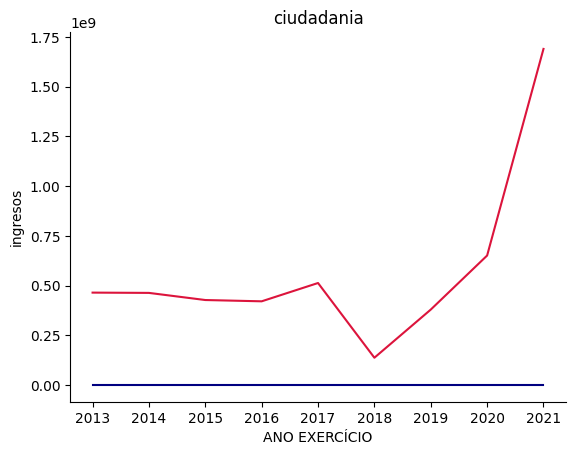

In [7]:
fs.evolucion_temporal(temporal_ciudadania, "ANO EXERCÍCIO",["VALOR LANÇADO", "VALOR REALIZADO"])

# REVISAR

### *Ministerio de Ciencia, Tecnología e Innovación* 🔬

In [13]:
# Vemos la información general del ministerio, sus ingresos y las unidades ministeriales que lo componen
fs.info_ministerio(datos_brasil, "Ministério da Ciência, Tecnologia, Inovações")

Los órganos de los que se compone el Ministério da Ciência, Tecnologia, Inovações son: []
Las unidades gestoras que componen los órganos del Ministério da Ciência, Tecnologia, Inovações son: []
Los ingresos entre 2013 y 2025 del Ministério da Ciência, Tecnologia, Inovações son: 



,VALOR PREVISTO ATUALIZADO,VALOR LANÇADO,VALOR REALIZADO,porcentaje recaudado,diferencia_recaudacion
NOME ÓRGÃO SUPERIOR,,,,,


In [14]:
# Vemos la información temporal sobre el ministerio
temporal_ciencia = fs.info_ministerio(datos_brasil, "Ministério da Ciência, Tecnologia, Inovações")
temporal_ciencia

,VALOR LANÇADO,VALOR REALIZADO
ANO EXERCÍCIO,,


In [15]:
# Vemos la información sobre su composición.
fs.info_ministerio(datos_brasil, "Ministério da Ciência, Tecnologia, Inovações")

,,VALOR PREVISTO ATUALIZADO,VALOR LANÇADO,VALOR REALIZADO,porcentaje_recaudacion
NOME ÓRGÃO,NOME UNIDADE GESTORA,,,,


In [ ]:
# Graficamos la evolución temporal
fs.evolucion_temporal(temporal_ciencia, "ANO EXERCÍCIO",["VALOR LANÇADO", "VALOR REALIZADO"])

### *Ministerio de Defensa (Ministério da Defesa)* 🚓


In [16]:
# Vemos la información general del ministerio, sus ingresos y las unidades ministeriales que lo componen
fs.info_ministerio(datos_brasil, "Ministério da Defesa")

Los órganos de los que se compone el Ministério da Defesa son: ['Fundo Aeronáutico' 'Fundo do Exército'
 'Comando da Marinha - Fundo Naval' 'Fundo Aeroviário'
 'Comando da Marinha' 'Comando do Exército' 'Comando da Aeronáutica'
 'Caixa de Construções de Casas para o Pessoal da Marinha do Brasil'
 'Ministério da Defesa - Unidades com vínculo direto'
 'Fundo de Desenvolvimento do Ensino Profissional Marítimo'
 'Indústria de Material Bélico do Brasil'
 'Caixa de Financiamento Imobiliário da Aeronáutica' 'Fundação Osório'
 'Amazônia Azul Tecnologia de Defesa S.A.']
Las unidades gestoras que componen los órganos del Ministério da Defesa son: ['SECRETARIA DE ECON. E FIN.DA AER.- F.AER.' 'FUNDO DO EXERCITO'
 'DIRETORIA DE FINANCAS-SISTEMA PARA O PAIS/MM'
 'AGENCIA NACIONAL DE AVIACAO CIVIL - F. AEROV.'
 'DIRETORIA DE FINANCAS DA MARINHA-SISTEMA-PAIS'
 'D CONT - SETORIAL FINANCEIRA'
 'DIRETORIA DE ECON E FINANCAS DA AERONAUTICA'
 'DIRETORIA DE FINANCAS DA MARINHA - CCCPM'
 'DEPARTAMENTO DE PLA

,VALOR PREVISTO ATUALIZADO,VALOR LANÇADO,VALOR REALIZADO,porcentaje recaudado,diferencia_recaudacion
NOME ÓRGÃO SUPERIOR,,,,,
Ministério da Defesa,"198,522,792,044.00",0.00,"104,665,740,965.96",52.72,"104,665,740,965.96"


In [17]:
# Vemos la información temporal sobre el ministerio
temporal_defensa = fs.info_ministerio(datos_brasil, "Ministério da Defesa")
temporal_defensa

,VALOR LANÇADO,VALOR REALIZADO
ANO EXERCÍCIO,,
2013,0.00,"7,996,268,815.41"
2014,0.00,"8,799,586,489.04"
2015,0.00,"10,208,523,254.25"
2016,0.00,"12,433,424,392.19"
2017,0.00,"12,551,250,887.04"
2018,0.00,"11,885,716,237.33"
2019,0.00,"12,929,824,036.30"
2020,0.00,"13,639,504,609.70"
2021,0.00,"14,221,642,244.70"


In [23]:
# Vemos la información sobre su composición.
fs.info_ministerio(datos_brasil, "Ministério da Defesa")

VALOR PREVISTO ATUALIZADO  \
NOME ÓRGÃO                                         NOME UNIDADE GESTORA                                                       
Amazônia Azul Tecnologia de Defesa S.A.            DIRETORIA DE FINANCAS DA MARINHA - AMAZUL                 286,164,674.00   
Caixa de Construções de Casas para o Pessoal da... DIRETORIA DE FINANCAS DA MARINHA - CCCPM                2,259,976,175.00   
Caixa de Financiamento Imobiliário da Aeronáutica  CAIXA FINANCIAMENTO IMOBILIARIO AERONAUTICA                80,735,884.00   
Comando da Aeronáutica                             DIRETORIA DE ECON E FINANCAS DA AERONAUTICA            28,352,346,044.00   
                                                   MAER - DIFERENCA CAMBIAL                                            0.00   
Comando da Marinha                                 DIRETORIA DE FINANCAS DA MARINHA-SISTEMA-PAIS          36,912,112,387.00   
                                                   MARINHA - DIFERENCA CAMBIAL                                         0.00   
Comando da Marinha - Fundo Naval                   DIRETORIA DE FINANCAS-SISTEMA PARA O PAIS/MM            7,343,977,665.00   
                                                   FUNDO NAVAL - DIFERENCA CAMBIAL                                     0.00   
Comando do Exército                                D CONT - SETORIAL FINANCEIRA                           46,456,579,586.00   
Fundação Osório                                    FUNDACAO OSORIO                                            21,949,102.00   
Fundo Aeronáutico                                  SECRETARIA DE ECON. E FIN.DA AER.- F.AER.              27,712,065,766.00   
Fundo Aeroviário                                   AGENCIA NACIONAL DE AVIACAO CIVIL - F. AEROV.                       0.00   
Fundo de Desenvolvimento do Ensino Profissional... DIRETORIA DE FINANCAS-SISTEMA PARA O PAIS/MM            1,958,564,873.00   
Fundo do Exército                                  FDO EXERCITO - DIFERENCA CAMBIAL                                    0.00   
                                                   FUNDO DO EXERCITO                                      13,480,186,945.00   
Indústria de Material Bélico do Brasil             INDUSTRIA DE MATERIAL BELICO DO BRASIL/GESTOR             941,148,173.00   
Ministério da Defesa - Unidades com vínculo direto DEPARTAMENTO DE PLANEJ, ORC E FINANCAS (MD)            32,716,984,770.00   

                                                                                                  VALOR LANÇADO  \
NOME ÓRGÃO                                         NOME UNIDADE GESTORA                                           
Amazônia Azul Tecnologia de Defesa S.A.            DIRETORIA DE FINANCAS DA MARINHA - AMAZUL               0.00   
Caixa de Construções de Casas para o Pessoal da... DIRETORIA DE FINANCAS DA MARINHA - CCCPM                0.00   
Caixa de Financiamento Imobiliário da Aeronáutica  CAIXA FINANCIAMENTO IMOBILIARIO AERONAUTICA             0.00   
Comando da Aeronáutica                             DIRETORIA DE ECON E FINANCAS DA AERONAUTICA             0.00   
                                                   MAER - DIFERENCA CAMBIAL                                0.00   
Comando da Marinha                                 DIRETORIA DE FINANCAS DA MARINHA-SISTEMA-PAIS           0.00   
                                                   MARINHA - DIFERENCA CAMBIAL                             0.00   
Comando da Marinha - Fundo Naval                   DIRETORIA DE FINANCAS-SISTEMA PARA O PAIS/MM            0.00   
                                                   FUNDO NAVAL - DIFERENCA CAMBIAL                         0.00   
Comando do Exército                                D CONT - SETORIAL FINANCEIRA                            0.00   
Fundação Osório                                    FUNDACAO OSORIO                                         0.00   
Fundo Aeronáutico                                  SECRETARIA 

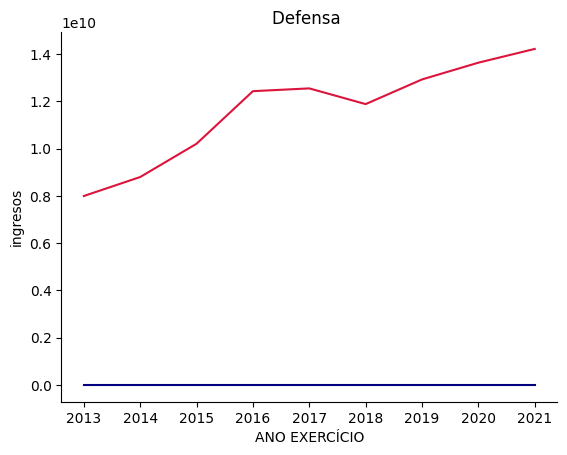

In [19]:
# Graficamos la evolución temporal
fs.evolucion_temporal(temporal_defensa, "ANO EXERCÍCIO",["VALOR LANÇADO", "VALOR REALIZADO"])

### *Ministerio de Economía/ Hacienda (Ministério da Economia/Fazenda)* 💰

In [24]:
# Vemos la información general del ministerio, sus ingresos y las unidades ministeriales que lo componen
fs.info_ministerio(datos_brasil, "Ministério da Economia")

Los órganos de los que se compone el Ministério da Economia son: ['Ministério da Economia - Unidades com vínculo direto'
 'Instituto Nacional de Metrologia, Qualidade e Tecnologia'
 'Instituto Nacional do Seguro Social'
 'Fundação Instituto Brasileiro de Geografia e Estatística'
 'Superintendência da Zona Franca de Manaus'
 'Banco Central do Brasil - Orçamento Fiscal e Seguridade Social'
 'Fundo de Amparo ao Trabalhador' 'Superintendência de Seguros Privados'
 'Superintendência Nacional de Previdência Complementar'
 'Instituto Nacional da Propriedade Industrial'
 'Comissão de Valores Mobiliários'
 'Fundação Jorge Duprat Figueiredo, de Segurança e Medicina do Trabalho'
 'Fundação Escola Nacional de Administração Pública'
 'Fundo Constitucional do Distrito Federal'
 'Serviço Federal de Processamento de Dados'
 'Fundo de Garantia à Exportação'
 'Companhia de Entrepostos e Armazéns Gerais de São Paulo'
 'Fundo de Compensação de Variações Salariais' 'Casa da Moeda do Brasil'
 'Fundo de Esta

,VALOR PREVISTO ATUALIZADO,VALOR LANÇADO,VALOR REALIZADO,porcentaje recaudado,diferencia_recaudacion
NOME ÓRGÃO SUPERIOR,,,,,
Ministério da Economia,"26,486,420,136,019.00","5,367,369,003,775.87","24,709,753,338,137.24",93.29,"19,342,384,334,361.37"


In [25]:
# Vemos la información temporal sobre el ministerio
temporal_economia = fs.info_ministerio(datos_brasil, "Ministério da Economia")
temporal_economia

,VALOR LANÇADO,VALOR REALIZADO
ANO EXERCÍCIO,,
2013,"1,142,510,812,240.63","1,817,203,128,234.24"
2014,"1,266,517,976,553.31","2,157,443,569,562.18"
2015,"307,183,706,610.45","2,580,695,615,515.46"
2016,"325,832,148,068.27","2,735,629,351,666.91"
2017,"458,047,252,394.30","2,454,950,768,575.88"
2018,"466,611,880,983.15","2,853,016,876,441.76"
2019,"341,927,061,565.79","2,808,484,295,474.50"
2020,"701,810,109,974.20","3,531,378,318,841.18"
2021,"356,928,055,385.77","3,770,951,413,825.13"


In [37]:
# Vemos la información sobre su composición.
economia = fs.info_ministerio(datos_brasil, "Ministério da Economia")
economia

,,VALOR PREVISTO ATUALIZADO,VALOR LANÇADO,VALOR REALIZADO,porcentaje_recaudacion
NOME ÓRGÃO,NOME UNIDADE GESTORA,,,,
Banco Central do Brasil - Orçamento Fiscal e Seguridade Social,BANCO CENTRAL DO BRASIL,"6,434,042,090.00",0.00,"7,261,721,544.67",112.86
Casa da Moeda do Brasil,CASA DA MOEDA DO BRASIL,"7,805,920,775.00",0.00,"9,922,050,070.42",127.11
Comissão de Valores Mobiliários,COMISSAO DE VALORES MOBILIARIOS,"3,838,580,798.00","1,023,322,055.73","3,821,151,456.84",99.55
Companhia de Entrepostos e Armazéns Gerais de São Paulo,CIA.DE ENTREPOSTOS E ARMAZENS GER.DE S.PAULO,0.00,0.00,"829,668,503.77",inf
Fundação Escola Nacional de Administração Pública,FUNDACAO ESCOLA NACIONAL DE ADM. PUBLICA,"79,097,837.00",0.00,"7,265,134.34",9.18
...,...,...,...,...,...
Reserva de Contingência,RESERVA DE CONTINGENCIA/MEFP,"8,328,542,066.00",0.00,0.00,0.00
Serviço Federal de Processamento de Dados,SERPRO-SEDE - DEPARTAMENTO FINANCEIRO,0.00,0.00,"19,145,795,158.49",inf
Superintendência Nacional de Previdência Complementar,COORD.GERAL DE ORC. FIN. E CONTABILIDADE,"401,149,074.00","53,977.93","463,747,213.57",115.60


In [38]:
economia[economia["VALOR REALIZADO"] == 0]

VALOR PREVISTO ATUALIZADO  \
NOME ÓRGÃO                                         NOME UNIDADE GESTORA                                                       
Ministério da Economia - Unidades com vínculo d... PROCURADORIA DA FAZ.NAC. NO ESTADO DO AMAPA                         0.00   
                                                   PROCURADORIA DA FAZENDA NACI0NAL/GO                                 0.00   
                                                   PROCURADORIA DA FAZENDA NACIONAL - BA                               0.00   
                                                   PROCURADORIA DA FAZENDA NACIONAL - MA                               0.00   
                                                   PROCURADORIA DA FAZENDA NACIONAL - MG                               0.00   
                                                   PROCURADORIA DA FAZENDA NACIONAL - PI                               0.00   
                                                   PROCURADORIA DA FAZENDA NACIONAL EM RONDONIA                        0.00   
                                                   PROCURADORIA DA FAZENDA NACIONAL-ES                                 0.00   
                                                   PROCURADORIA DA FAZENDA NACIONAL-MS                                 0.00   
                                                   PROCURADORIA DA FAZENDA NACIONAL-PR                                 0.00   
                                                   PROCURADORIA DA FAZENDA NACIONAL-SE                                 0.00   
                                                   PROCURADORIA DA FAZENDA NACIONAL/AC                                 0.00   
                                                   PROCURADORIA DA FAZENDA NACIONAL/AL                                 0.00   
                                                   PROCURADORIA DA FAZENDA NACIONAL/AM                                 0.00   
                                                   PROCURADORIA DA FAZENDA NACIONAL/CE                                 0.00   
                                                   PROCURADORIA DA FAZENDA NACIONAL/MT                                 0.00   
                                                   PROCURADORIA DA FAZENDA NACIONAL/PA                                 0.00   
                                                   PROCURADORIA DA FAZENDA NACIONAL/PB                                 0.00   
                                                   PROCURADORIA DA FAZENDA NACIONAL/RN                                 0.00   
                                                   PROCURADORIA DA FAZENDA NACIONAL/RR                                 0.00   
                                                   PROCURADORIA DA FAZENDA NACIONAL/SC                                 0.00   
                                                   PROCURADORIA FAZ.NACIONAL NO EST.TOCANTINS                          0.00   
                                                   PROCURADORIA GERAL DA FAZENDA NACIONAL                              0.00   
                                                   PROCURADORIA REGIONAL DA F.NACIONAL/4A REGIAO                       0.00   
                                                   PROCURADORIA-REGIONAL DA FAZ.NAC.1A.REGIAO/DF                       0.00   
                                                   PROCURADORIA-REGIONAL DA FAZENDA NACIONAL/PE                        0.00   
                                                   PROCURADORIA-REGIONAL DA FAZENDA NACIONAL/RJ                        0.00   
                                                   PROCURADORIA-REGIONAL DA FAZENDA NACIONAL/SP                        0.00   
                                                   SECRETARIA DA RECEITA FEDERAL DO BRASIL-RFB                         0.00   
Reserva de Contingência                            RESERVA DE CONTINGENCIA/MEFP                            8,328,542,066.00   

                                 

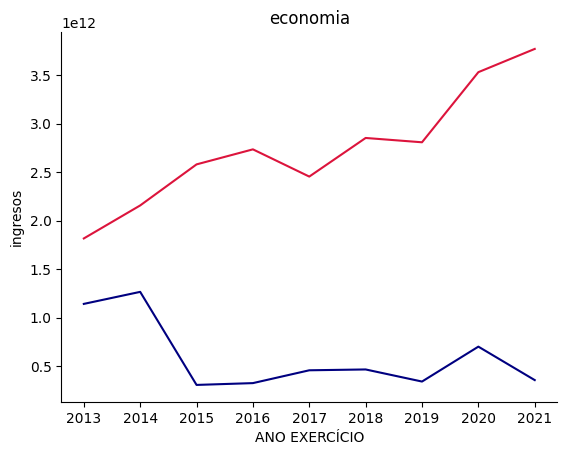

In [27]:
# Graficamos la evolución temporal
fs.evolucion_temporal(temporal_economia, "ANO EXERCÍCIO",["VALOR LANÇADO", "VALOR REALIZADO"])

### *Ministerio de Educación (Ministério da Educação)* 📚

In [39]:
# Vemos la información general del ministerio, sus ingresos y las unidades ministeriales que lo componen
fs.info_ministerio(datos_brasil, "Ministério da Educação")

Los órganos de los que se compone el Ministério da Educação son: ['Instituto Federal do Rio Grande do Norte'
 'Fundação Universidade Federal do Mato Grosso'
 'Ministério da Educação - Unidades com vínculo direto'
 'Fundação Universidade Federal de São João Del-Rei'
 'Universidade Federal do Ceará' 'Instituto Federal Goiano'
 'Universidade Federal da Bahia' 'Instituto Federal do Ceará'
 'Fundação Joaquim Nabuco' 'Instituto Federal de Sergipe'
 'Instituto Federal Catarinense'
 'Universidade Tecnológica Federal do Paraná'
 'Fundação Universidade Federal do Tocantins'
 'Universidade Federal do Espírito Santo'
 'Fundação Universidade Federal do Acre'
 'Universidade Federal de Minas Gerais' 'Universidade Federal de Itajubá'
 'Universidade Federal do Rio Grande do Sul' 'Instituto Federal do Paraná'
 'Instituto Federal do Mato Grosso'
 'Universidade Federal do Rio Grande do Norte'
 'Instituto Federal de Rondônia'
 'Instituto Federal do Sudeste de Minas Gerais'
 'Fundação Universidade do Amazon

,VALOR PREVISTO ATUALIZADO,VALOR LANÇADO,VALOR REALIZADO,porcentaje recaudado,diferencia_recaudacion
NOME ÓRGÃO SUPERIOR,,,,,
Ministério da Educação,"609,585,887,826.00","3,516,427.16","221,589,353,642.78",36.35,"221,585,837,215.62"


In [40]:
# Vemos la información temporal sobre el ministerio
temporal_educacion = fs.info_ministerio(datos_brasil, "Ministério da Educação")
temporal_educacion

,VALOR LANÇADO,VALOR REALIZADO
ANO EXERCÍCIO,,
2013,"160,913.49","19,607,835,174.99"
2014,"159,089.35","21,757,647,187.75"
2015,"399,553.04","22,633,975,456.41"
2016,"399,553.04","23,096,703,890.74"
2017,"399,553.04","23,454,995,198.27"
2018,"399,553.04","26,118,137,483.09"
2019,"399,553.04","27,441,782,079.02"
2020,"799,106.08","26,996,680,668.96"
2021,"399,553.04","30,481,596,503.55"


In [43]:
# Vemos la información sobre su composición.
fs.info_ministerio(datos_brasil, "Ministério da Educação").sort_values("VALOR REALIZADO")

,,VALOR PREVISTO ATUALIZADO,VALOR LANÇADO,VALOR REALIZADO,porcentaje_recaudacion
NOME ÓRGÃO,NOME UNIDADE GESTORA,,,,
Instituto Federal Fluminense,INST.FED. FLUMINENSE/CAMPUS CAMPOS-CENTRO,0.00,"332,054.40",0.00,NaN
UNIVERSIDADE FEDERAL DE RONDONOPOLIS,UNIVERSIDADE FEDERAL DE RONDONOPOLIS,"15,559,976.00",0.00,"1,480.00",0.01
UNIVERSIDADE FEDERAL DO AGRESTE DE PERNAMBUCO,UNIVERSIDADE FEDERAL DO AGRESTE DE PERNAMBUCO,"13,824,033.00",0.00,"8,905.61",0.06
UNIVERSIDADE FEDERAL DE CATALAO,UNIVERSIDADE FEDERAL DE CATALAO,"15,429,240.00",0.00,"9,750.00",0.06
UNIVERSIDADE FEDERAL DO NORTE DE TOCANTINS,UNIVERSIDADE FEDERAL DO NORTE DE TOCANTINS,"20,473,210.00",0.00,"13,613.00",0.07
...,...,...,...,...,...
Universidade Federal de Juiz de Fora,UNIVERSIDADE FEDERAL DE JUIZ DE FORA,"1,623,914,885.00",0.00,"1,033,748,750.01",63.66
Fundação Universidade de Brasília,FUNDACAO UNIVERSIDADE DE BRASILIA - FUB,"3,169,915,847.00",0.00,"1,500,216,608.02",47.33
Instituto Nacional de Estudos e Pesquisas Educacionais Anísio Teixeira,INST.NACIONAL DE EST.E PESQUISAS EDUCACIONAIS,"2,079,505,398.00",0.00,"1,552,515,195.36",74.66


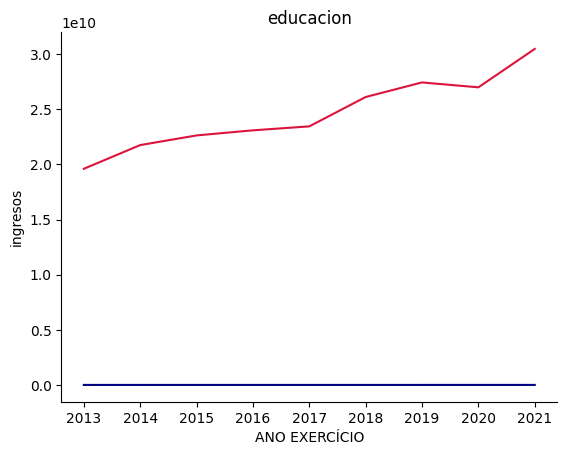

In [42]:
# Graficamos la evolución temporal
fs.evolucion_temporal(temporal_educacion, "ANO EXERCÍCIO",["VALOR LANÇADO", "VALOR REALIZADO"])

### *Ministerio de Infraestructuras/Transportes (Ministério da Infraestrutura/dos Transportes)* 🚊

In [44]:
# Vemos la información general del ministerio, sus ingresos y las unidades ministeriales que lo componen
fs.info_ministerio(datos_brasil, "Ministério da Infraestrutura")

Los órganos de los que se compone el Ministério da Infraestrutura son: ['Agência Nacional de Aviação Civil'
 'Departamento Nacional de Infraestrutura de Transportes'
 'Agência Nacional de Transportes Terrestres'
 'Departamento do Fundo da Marinha Mercante'
 'Fundo Nacional de Segurança e Educação de Trânsito'
 'Ministério da Infraestrutura - Unidades com vínculo direto'
 'Agência Nacional de Transportes Aquaviários' 'Secretaria de Portos'
 'VALEC Engenharia, Construções e Ferrovias S.A.'
 'Fundo Nacional de Aviação Civil'
 'Empresa de Planejamento e Logística S.A.' 'Secretaria de Aviação Civil'
 'Companhia Docas do Estado de São Paulo'
 'Companhia Docas do Estado da Bahia' 'Companhia Docas do Ceará'
 'Companhia Docas do Rio de Janeiro'
 'Companhia Docas do Rio Grande do Norte' 'Companhia Docas do Pará'
 'Companhia Docas do Espírito Santo'
 'Departamento Nacional de Estradas de Rodagem']
Las unidades gestoras que componen los órganos del Ministério da Infraestrutura son: ['AGENCIA NACIO

,VALOR PREVISTO ATUALIZADO,VALOR LANÇADO,VALOR REALIZADO,porcentaje recaudado,diferencia_recaudacion
NOME ÓRGÃO SUPERIOR,,,,,
Ministério da Infraestrutura,"119,972,882,836.00",0.00,"136,206,900,382.34",113.53,"136,206,900,382.34"


In [45]:
# Vemos la información temporal sobre el ministerio
temporal_infraestructura = fs.info_ministerio(datos_brasil, "Ministério da Infraestrutura")
temporal_infraestructura

,VALOR LANÇADO,VALOR REALIZADO
ANO EXERCÍCIO,,
2013,0.00,"9,136,194,243.39"
2014,0.00,"10,162,876,142.09"
2015,0.00,"12,544,696,151.42"
2016,0.00,"13,585,810,762.08"
2017,0.00,"18,560,601,637.35"
2018,0.00,"14,553,996,552.88"
2019,0.00,"19,038,929,256.20"
2020,0.00,"19,330,610,034.23"
2021,0.00,"19,293,185,602.70"


In [49]:
# Vemos la información sobre su composición.
fs.info_ministerio(datos_brasil, "Ministério da Infraestrutura")

VALOR PREVISTO ATUALIZADO  \
NOME ÓRGÃO                                         NOME UNIDADE GESTORA                                                       
Agência Nacional de Aviação Civil                  AGENCIA NACIONAL DE AVIACAO CIVIL                       3,105,073,414.00   
                                                   SUPERINT. INFRAESTRUTURA AEROPORTUARIA - ANAC                       0.00   
Agência Nacional de Transportes Aquaviários        AGENCIA NACIONAL DE TRANSPORTES AQUAVIARIOS               470,636,394.00   
Agência Nacional de Transportes Terrestres         AGENCIA NACIONAL DE TRANSPORTES TERRESTRES              7,994,003,773.00   
Companhia Docas do Ceará                           COMPANHIA DOCAS DO CEARA                                            0.00   
Companhia Docas do Espírito Santo                  COMPANHIA DOCAS DO ESPIRITO SANTO                                   0.00   
Companhia Docas do Estado da Bahia                 COMPANHIA DOCAS DO ESTADO DA BAHIA                                  0.00   
Companhia Docas do Estado de São Paulo             COMPANHIA DOCAS DO ESTADO DE SAO PAULO                              0.00   
Companhia Docas do Pará                            COMPANHIA DOCAS DO PARA                                             0.00   
Companhia Docas do Rio Grande do Norte             COMPANHIA DOCA DO RIO GRANDE DO NORTE                               0.00   
Companhia Docas do Rio de Janeiro                  COMPANHIA DOCAS DO RIO DE JANEIRO                                   0.00   
Departamento Nacional de Estradas de Rodagem       DEPARTAMENTO NAC. ESTRADAS E RODAGEM-EXTINCAO                       0.00   
Departamento Nacional de Infraestrutura de Tran... DEPART.NAC.INFRA ESTRUTURA TRANSPORTES.                 5,907,564,022.00   
Departamento do Fundo da Marinha Mercante          FUNDO DA MARINHA MERCANTE                              49,854,529,844.00   
Empresa de Planejamento e Logística S.A.           EMPRESA DE PLANEJAMENTO E LOGISTICA S.A - EPL              76,611,806.00   
Fundo Nacional de Aviação Civil                    FUNDO NACIONAL DE AVIACAO CIVIL                        40,635,944,674.00   
Fundo Nacional de Segurança e Educação de Trânsito FUNDO NACIONAL DE SEG. E EDUCACAO DE TRANSITO           8,761,721,319.00   
Ministério da Infraestrutura - Unidades com vín... SUBSECRETARIA DE PLAN.,ORCAM.E ADMIN.SETORIAL           3,016,389,393.00   
Secretaria de Aviação Civil                        SECRETARIA DE AVIACAO CIVIL/PR                                      0.00   
Secretaria de Portos                               SECRETARIA DE PORTOS/PR                                     7,659,245.00   
VALEC Engenharia, Construções e Ferrovias S.A.     VALEC ENGENHARIA CONSTRUCOES E FERROVIAS S/A.             142,748,952.00   

                                                                                                  VALOR LANÇADO  \
NOME ÓRGÃO                                         NOME UNIDADE GESTORA                                           
Agência Nacional de Aviação Civil                  AGENCIA NACIONAL DE AVIACAO CIVIL                       0.00   
                                                   SUPERINT. INFRAESTRUTURA AEROPORTUARIA - ANAC           0.00   
Agência Nacional de Transportes Aquaviários        AGENCIA NACIONAL DE TRANSPORTES AQUAVIARIOS             0.00   
Agência Nacional de Transportes Terrestres         AGENCIA NACIONAL DE TRANSPORTES TERRESTRES              0.00   
Companhia Docas do Ceará                           COMPANHIA DOCAS DO CEARA                                0.00   
Companhia Docas do Espírito Santo                  COMPANHIA DOCAS DO ESPIRITO SANTO                       0.00   
Companhia Docas do Estado da Bahia                 COMPANHIA DOCAS DO ESTADO DA BAHIA                      0.00   
Companhia Docas do Estado de São Paulo             COMPANHIA DOCAS DO ESTADO DE SAO PAULO                  0.00   
Companhia Docas do Pará   

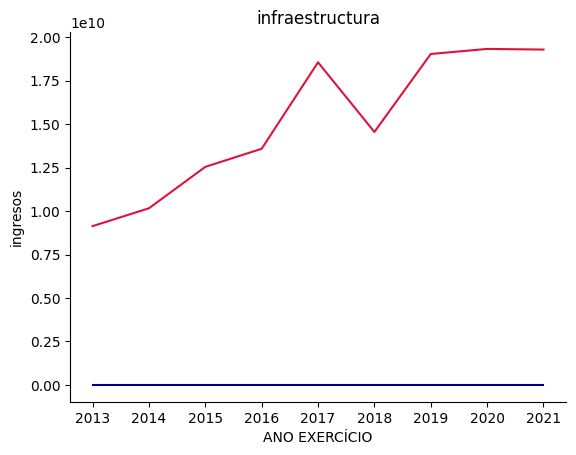

In [47]:
# Graficamos la evolución temporal
fs.evolucion_temporal(temporal_infraestructura, "ANO EXERCÍCIO",["VALOR LANÇADO", "VALOR REALIZADO"])

### *Ministerio de Justicia y Seguridad Pública (Ministério da Justiça e Segurança Pública)* 👮

In [50]:
# Vemos la información general del ministerio, sus ingresos y las unidades ministeriales que lo componen
fs.info_ministerio(datos_brasil, "Ministério da Justiça e Segurança Pública")

Los órganos de los que se compone el Ministério da Justiça e Segurança Pública son: ['Departamento de Polícia Rodoviária Federal'
 'Departamento de Polícia Federal'
 'Secretaria Nacional do Consumidor Fundo' 'Fundo Penitenciário Nacional'
 'Fundação Nacional do Índio'
 'Conselho Administrativo de Defesa Econômica'
 'Fundo Nacional de Segurança Pública'
 'Ministério da Justiça e Segurança Pública - Unidades com vínculo direto'
 'Fundo Nacional Antidrogas'
 'Fundação Nacional do Índio - Patrimônio Indígena']
Las unidades gestoras que componen los órganos del Ministério da Justiça e Segurança Pública son: ['DEPTO.DE POLICIA RODOVIARIA FEDERAL'
 'COORDENACAO DE ORCAMENTO FINANCAS CONTABILIDA'
 'FUNDO DE DEFESA DOS DIREITOS DIFUSOS' 'DEPEN - DIRETORIA EXECUTIVA'
 'FUNDACAO NACIONAL DO INDIO - U.O.'
 'CONSELHO ADMINISTRATIVO DE DEFESA ECONOMICA'
 'FUNDO NACIONAL DE SEGURANCA PUBLICA - FNSP'
 'COORDENACAO DE ORCAMENTO E FINANCAS - COF/DPF'
 'COORDENACAO-GERAL DE ORCAMENTO E FINANCAS-MJ'
 'FUN

,VALOR PREVISTO ATUALIZADO,VALOR LANÇADO,VALOR REALIZADO,porcentaje recaudado,diferencia_recaudacion
NOME ÓRGÃO SUPERIOR,,,,,
Ministério da Justiça e Segurança Pública,"36,304,805,355.02",0.00,"25,219,154,299.03",69.47,"25,219,154,299.03"


In [51]:
# Vemos la información temporal sobre el ministerio
temporal_justicia = fs.info_ministerio(datos_brasil, "Ministério da Justiça e Segurança Pública")
temporal_justicia

,VALOR LANÇADO,VALOR REALIZADO
ANO EXERCÍCIO,,
2013,0.00,"1,387,996,151.58"
2014,0.00,"1,576,975,525.75"
2015,0.00,"2,338,091,641.90"
2016,0.00,"2,830,886,068.37"
2017,0.00,"2,786,600,533.93"
2018,0.00,"2,216,559,400.21"
2019,0.00,"3,992,215,693.03"
2020,0.00,"3,989,584,816.44"
2021,0.00,"4,100,244,467.82"


In [52]:
# Vemos la información sobre su composición.
fs.info_ministerio(datos_brasil, "Ministério da Justiça e Segurança Pública")

VALOR PREVISTO ATUALIZADO  \
NOME ÓRGÃO                                         NOME UNIDADE GESTORA                                                       
Conselho Administrativo de Defesa Econômica        CONSELHO ADMINISTRATIVO DE DEFESA ECONOMICA               274,079,653.00   
Departamento de Polícia Federal                    COORDENACAO DE ORCAMENTO E FINANCAS - COF/DPF                       0.00   
                                                   COORDENACAO DE ORCAMENTO FINANCAS CONTABILIDA          11,005,405,661.00   
Departamento de Polícia Rodoviária Federal         COORDENACAO DE ORCAMENTO E FINANCAS - PRF               5,412,239,561.00   
                                                   DEPTO.DE POLICIA RODOVIARIA FEDERAL                     3,493,073,317.00   
Fundação Nacional do Índio                         FUNDACAO NACIONAL DO INDIO - U.O.                         487,327,913.00   
Fundação Nacional do Índio - Patrimônio Indígena   RENDA DO PATRIMONIO INDIGENA                              400,396,427.02   
Fundo Nacional Antidrogas                          FUNDO NACIONAL ANTIDROGAS                                 378,278,197.00   
Fundo Nacional de Segurança Pública                FUNDO NACIONAL DE SEGURANCA PUBLICA - FNSP              3,012,834,756.00   
Fundo Penitenciário Nacional                       DEPEN - DIRETORIA EXECUTIVA                             3,884,210,844.00   
Ministério da Justiça e Segurança Pública - Uni... COORDENACAO-GERAL DE ORCAMENTO E FINANCAS-MJ            4,100,338,626.00   
Secretaria Nacional do Consumidor Fundo            FUNDO DE DEFESA DOS DIREITOS DIFUSOS                    3,856,620,400.00   

                                                                                                  VALOR LANÇADO  \
NOME ÓRGÃO                                         NOME UNIDADE GESTORA                                           
Conselho Administrativo de Defesa Econômica        CONSELHO ADMINISTRATIVO DE DEFESA ECONOMICA             0.00   
Departamento de Polícia Federal                    COORDENACAO DE ORCAMENTO E FINANCAS - COF/DPF           0.00   
                                                   COORDENACAO DE ORCAMENTO FINANCAS CONTABILIDA           0.00   
Departamento de Polícia Rodoviária Federal         COORDENACAO DE ORCAMENTO E FINANCAS - PRF               0.00   
                                                   DEPTO.DE POLICIA RODOVIARIA FEDERAL                     0.00   
Fundação Nacional do Índio                         FUNDACAO NACIONAL DO INDIO - U.O.                       0.00   
Fundação Nacional do Índio - Patrimônio Indígena   RENDA DO PATRIMONIO INDIGENA                            0.00   
Fundo Nacional Antidrogas                          FUNDO NACIONAL ANTIDROGAS                               0.00   
Fundo Nacional de Segurança Pública                FUNDO NACIONAL DE SEGURANCA PUBLICA - FNSP              0.00   
Fundo Penitenciário Nacional                       DEPEN - DIRETORIA EXECUTIVA                             0.00   
Ministério da Justiça e Segurança Pública - Uni... COORDENACAO-GERAL DE ORCAMENTO E FINANCAS-MJ            0.00   
Secretaria Nacional do Consumidor Fundo            FUNDO DE DEFESA DOS DIREITOS DIFUSOS                    0.00   

                                                                                                  VALOR REALIZADO  \
NOME ÓRGÃO                                         NOME UNIDADE GESTORA                                             
Conselho Administrativo de Defesa Econômica        CONSELHO ADMINISTRATIVO DE DEFESA ECONOMICA     280,600,100.26   
Departamento de Polícia Federal                    COORDENACAO DE ORCAMENTO E FINANCAS - COF/DPF        10,058.33   
                                                   COORDENACAO DE ORCAMENTO FINANCAS CONTABILIDA 5,917,477,754.82   
Departamento de Polícia Rodoviária Federal         COORDENACAO DE ORCAMENTO E FINANCAS - PRF     2,199,140,496.75   
      

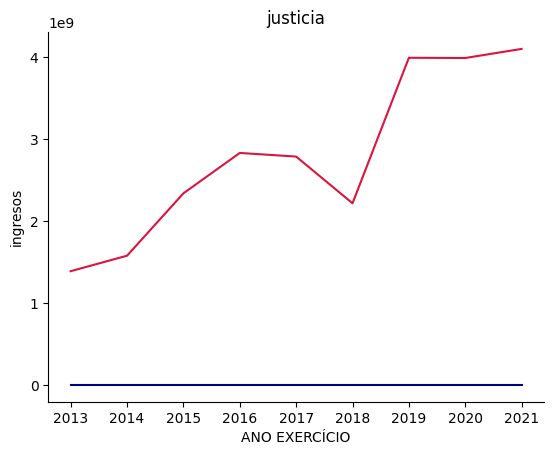

In [53]:
# Graficamos la evolución temporal
fs.evolucion_temporal(temporal_justicia, "ANO EXERCÍCIO",["VALOR LANÇADO", "VALOR REALIZADO"])

### *Ministerio de la Mujer (Ministério da Mulher, Família e Direitos Huma)* 🙆‍♀️

In [54]:
# Vemos la información general del ministerio, sus ingresos y las unidades ministeriales que lo componen
fs.info_ministerio(datos_brasil, "Ministério da Mulher, Família e Direitos Huma")

Los órganos de los que se compone el Ministério da Mulher, Família e Direitos Huma son: ['Secretaria Nacional de Políticas para Mulheres'
 'Fundo Nacional do Idoso' 'Fundo Nacional para a Criança e o Adolescente'
 'Ministério da Mulher, Família e Direitos Humanos - Unidades com vínculo direto']
Las unidades gestoras que componen los órganos del Ministério da Mulher, Família e Direitos Huma son: ['SECRETARIA DE POLITICAS PARA AS MULHERES' 'FUNDO NACIONAL DO IDOSO'
 'FUNDO NACIONAL PARA A CRIANCA E O ADOLESCENTE'
 'SETORIAL ORCAMENTARIA E FINANCEIRA - MDH']
Los ingresos entre 2013 y 2025 del Ministério da Mulher, Família e Direitos Huma son: 



,VALOR PREVISTO ATUALIZADO,VALOR LANÇADO,VALOR REALIZADO,porcentaje recaudado,diferencia_recaudacion
NOME ÓRGÃO SUPERIOR,,,,,
"Ministério da Mulher, Família e Direitos Huma","843,366,940.00",0.00,"211,689,152.70",25.10,"211,689,152.70"


In [55]:
# Vemos la información temporal sobre el ministerio
temporal_mujer = fs.info_ministerio(datos_brasil, "Ministério da Mulher, Família e Direitos Huma")
temporal_mujer

,VALOR LANÇADO,VALOR REALIZADO
ANO EXERCÍCIO,,
2013,0.00,"13,156,301.07"
2014,0.00,"7,976,509.04"
2015,0.00,"17,389,915.16"
2016,0.00,"26,119,550.42"
2017,0.00,"31,925,109.21"
2018,0.00,"32,743,917.35"
2019,0.00,"53,600,361.21"
2020,0.00,"15,147,995.63"
2021,0.00,"13,629,493.61"


In [56]:
# Vemos la información sobre su composición.
fs.info_ministerio(datos_brasil, "Ministério da Mulher, Família e Direitos Huma")

,,VALOR PREVISTO ATUALIZADO,VALOR LANÇADO,VALOR REALIZADO,porcentaje_recaudacion
NOME ÓRGÃO,NOME UNIDADE GESTORA,,,,
Fundo Nacional do Idoso,FUNDO NACIONAL DO IDOSO,"72,432,399.00",0.00,"63,524,447.98",87.70
Fundo Nacional para a Criança e o Adolescente,FUNDO NACIONAL PARA A CRIANCA E O ADOLESCENTE,"135,880,431.00",0.00,"82,983,217.77",61.07
"Ministério da Mulher, Família e Direitos Humanos - Unidades com vínculo direto",SETORIAL ORCAMENTARIA E FINANCEIRA - MDH,"634,086,610.00",0.00,"452,377.97",0.07
Secretaria Nacional de Políticas para Mulheres,SECRETARIA DE POLITICAS PARA AS MULHERES,"967,500.00",0.00,"64,729,108.98","6,690.35"


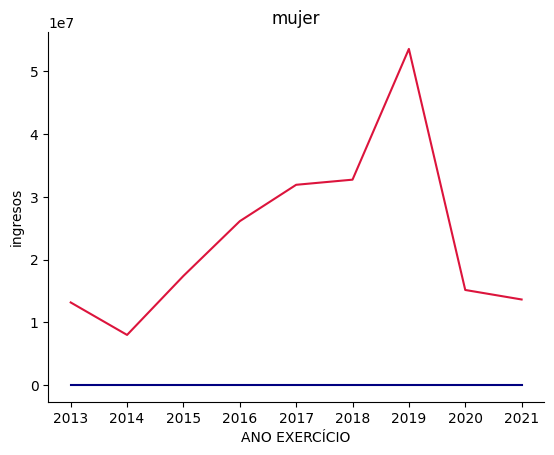

In [57]:
# Graficamos la evolución temporal
fs.evolucion_temporal(temporal_mujer, "ANO EXERCÍCIO",["VALOR LANÇADO", "VALOR REALIZADO"])

### *Ministerio de Pesca y Acuicultura (Ministério da Pesca e Aquicultura)* 🐙

In [58]:
# Vemos la información general del ministerio, sus ingresos y las unidades ministeriales que lo componen
fs.info_ministerio(datos_brasil, "Ministério da Pesca e Aquicultura")

Los órganos de los que se compone el Ministério da Pesca e Aquicultura son: ['Ministério da Pesca e Aquicultura - Unidades com vínculo direto']
Las unidades gestoras que componen los órganos del Ministério da Pesca e Aquicultura son: ['SECRETARIA EXECUTIVA-MPA']
Los ingresos entre 2013 y 2025 del Ministério da Pesca e Aquicultura son: 



,VALOR PREVISTO ATUALIZADO,VALOR LANÇADO,VALOR REALIZADO,porcentaje recaudado,diferencia_recaudacion
NOME ÓRGÃO SUPERIOR,,,,,
Ministério da Pesca e Aquicultura,"40,939,194.00",0.00,"57,749,317.66",141.06,"57,749,317.66"


In [61]:
# Vemos la información temporal sobre el ministerio
temporal_pesca = fs.info_ministerio(datos_brasil, "Ministério da Pesca e Aquicultura")
temporal_pesca

,VALOR LANÇADO,VALOR REALIZADO
ANO EXERCÍCIO,,
2013,0.00,"21,467,329.48"
2014,0.00,"14,830,883.37"
2015,0.00,"12,849,797.23"
2016,0.00,"8,601,307.58"


In [62]:
# Vemos la información sobre su composición.
fs.info_ministerio(datos_brasil, "Ministério da Pesca e Aquicultura")

,,VALOR PREVISTO ATUALIZADO,VALOR LANÇADO,VALOR REALIZADO,porcentaje_recaudacion
NOME ÓRGÃO,NOME UNIDADE GESTORA,,,,
Ministério da Pesca e Aquicultura - Unidades com vínculo direto,SECRETARIA EXECUTIVA-MPA,"40,939,194.00",0.00,"57,749,317.66",141.06


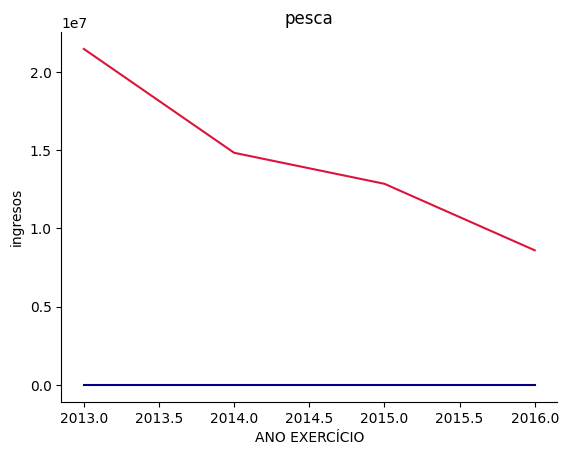

In [63]:
# Graficamos la evolución temporal
fs.evolucion_temporal(temporal_pesca, "ANO EXERCÍCIO",["VALOR LANÇADO", "VALOR REALIZADO"])

### *Ministerio de Bienestar Social (Ministério da Previdência Social)* 🙌

In [64]:
# Vemos la información general del ministerio, sus ingresos y las unidades ministeriales que lo componen
fs.info_ministerio(datos_brasil, "Ministério da Previdência Social")

Los órganos de los que se compone el Ministério da Previdência Social son: ['Ministério da Previdência Social - Unidades com vínculo direto']
Las unidades gestoras que componen los órganos del Ministério da Previdência Social son: ['COORDENACAO-GERAL DE ORC. FIN.E CONTABILIDADE']
Los ingresos entre 2013 y 2025 del Ministério da Previdência Social son: 



,VALOR PREVISTO ATUALIZADO,VALOR LANÇADO,VALOR REALIZADO,porcentaje recaudado,diferencia_recaudacion
NOME ÓRGÃO SUPERIOR,,,,,
Ministério da Previdência Social,"37,327,399.00",0.00,"14,240,783.79",38.15,"14,240,783.79"


In [65]:
# Vemos la información temporal sobre el ministerio
temporal_bienestar = fs.info_ministerio(datos_brasil, "Ministério da Previdência Social")
temporal_bienestar

,VALOR LANÇADO,VALOR REALIZADO
ANO EXERCÍCIO,,
2013,0.00,"610,839.63"
2014,0.00,"3,041,925.01"
2015,0.00,"10,294,806.99"
2016,0.00,"324,904.04"
2017,0.00,"120,153.80"
2018,0.00,"-151,845.68"


In [66]:
# Vemos la información sobre su composición.
fs.info_ministerio(datos_brasil, "Ministério da Previdência Social")

,,VALOR PREVISTO ATUALIZADO,VALOR LANÇADO,VALOR REALIZADO,porcentaje_recaudacion
NOME ÓRGÃO,NOME UNIDADE GESTORA,,,,
Ministério da Previdência Social - Unidades com vínculo direto,COORDENACAO-GERAL DE ORC. FIN.E CONTABILIDADE,"37,327,399.00",0.00,"14,240,783.79",38.15


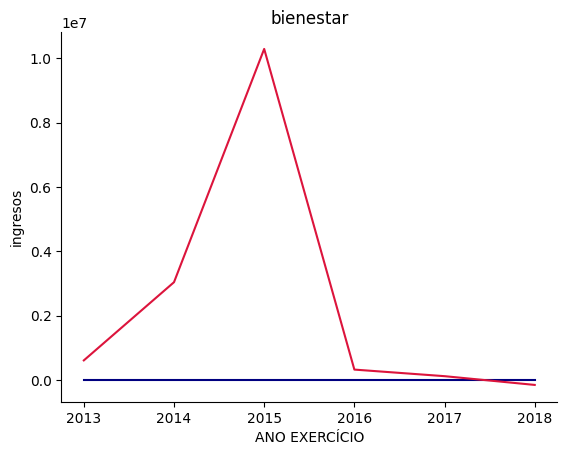

In [67]:
# Graficamos la evolución temporal
fs.evolucion_temporal(temporal_bienestar, "ANO EXERCÍCIO",["VALOR LANÇADO", "VALOR REALIZADO"])

In [71]:
datos_neg = datos_brasil[datos_brasil["NOME ÓRGÃO SUPERIOR"] == "Ministério da Previdência Social"]

In [72]:
datos_neg[datos_neg["VALOR REALIZADO"] < 0]

,CÓDIGO ÓRGÃO SUPERIOR,NOME ÓRGÃO SUPERIOR,CÓDIGO ÓRGÃO,NOME ÓRGÃO,CÓDIGO UNIDADE GESTORA,NOME UNIDADE GESTORA,CATEGORIA ECONÔMICA,ORIGEM RECEITA,ESPÉCIE RECEITA,DETALHAMENTO,VALOR PREVISTO ATUALIZADO,VALOR LANÇADO,VALOR REALIZADO,PERCENTUAL REALIZADO,DATA LANÇAMENTO,ANO EXERCÍCIO
167702,33000,Ministério da Previdência Social,33000,Ministério da Previdência Social - Unidades co...,330002,COORDENACAO-GERAL DE ORC. FIN.E CONTABILIDADE,Receitas Correntes,Outras Receitas Correntes,"Indenizações, restituições e ressarcimentos",OUTRAS RESTITUICOES-PRINCIPAL,0.00,0.00,-103.88,0.00,2016-04-01,2016
167728,33000,Ministério da Previdência Social,33000,Ministério da Previdência Social - Unidades co...,330002,COORDENACAO-GERAL DE ORC. FIN.E CONTABILIDADE,Receitas Correntes,Outras Receitas Correntes,"Indenizações, restituições e ressarcimentos",RESTIT.DE DESPESAS DE EXERC.ANTERIORES-PRINC.,0.00,0.00,"-1,149.22",0.00,2016-06-01,2016
542378,33000,Ministério da Previdência Social,33000,Ministério da Previdência Social - Unidades co...,330002,COORDENACAO-GERAL DE ORC. FIN.E CONTABILIDADE,Receitas Correntes,Receita de Serviços,Serviços Administrativos e Comerciais Gerais,INSCR.EM CONCURSOS E PROC.SELETIVOS-PRINCIPAL,0.00,0.00,"-151,845.68",0.00,2018-11-01,2018


### *Ministerio de Sanidad (Ministério da Saúde)* 🏥

In [73]:
# Vemos la información general del ministerio, sus ingresos y las unidades ministeriales que lo componen
fs.info_ministerio(datos_brasil, "Ministério da Saúde")

Los órganos de los que se compone el Ministério da Saúde son: ['Fundação Nacional de Saúde' 'Fundação Oswaldo Cruz'
 'Hospital Nossa Senhora da Conceição S.A.'
 'Ministério da Saúde - Unidades com vínculo direto'
 'Agência Nacional de Saúde Suplementar'
 'Agência Nacional de Vigilância Sanitária'
 'Hospital Cristo Redentor S.A.' 'Hospital Fêmina S.A.']
Las unidades gestoras que componen los órganos del Ministério da Saúde son: ['FUNDACAO NACIONAL DE SAUDE - DF' 'FUNDACAO OSWALDO CRUZ'
 'HOSPITAL NOSSA SENHORA DA CONCEICAO S/A'
 'SPO-COORD.-GERAL DE ORC.E FINANCAS/MS'
 'AGENCIA NACIONAL DE SAUDE SUPLEMENTAR'
 'AGENCIA NACIONAL DE VIGILANCIA SANITARIA' 'HOSPITAL CRISTO REDENTOR S/A'
 'HOSPITAL FEMINA S/A' 'FUNDACAO NACIONAL DE SAUDE - PB'
 'FUNDACAO NACIONAL DE SAUDE - PA' 'FUNDACAO NACIONAL DE SAUDE - ES'
 'FUNDACAO NACIONAL DE SAUDE - AP' 'FUNDACAO NACIONAL DE SAUDE - MT']
Los ingresos entre 2013 y 2025 del Ministério da Saúde son: 



,VALOR PREVISTO ATUALIZADO,VALOR LANÇADO,VALOR REALIZADO,porcentaje recaudado,diferencia_recaudacion
NOME ÓRGÃO SUPERIOR,,,,,
Ministério da Saúde,"46,656,321,844.00","125,949,190.83","37,786,245,892.63",80.99,"37,660,296,701.80"


In [74]:
# Vemos la información temporal sobre el ministerio
temporal_salud = fs.info_ministerio(datos_brasil, "Ministério da Saúde")
temporal_salud

,VALOR LANÇADO,VALOR REALIZADO
ANO EXERCÍCIO,,
2013,0.00,"4,682,143,747.32"
2014,"127,089.75","5,387,250,309.17"
2015,"60,944,485.17","5,475,019,511.84"
2016,"60,965,088.48","5,716,043,926.94"
2017,"630,757.22","4,958,719,872.44"
2018,"642,376.39","4,164,185,250.48"
2019,"655,110.16","3,460,404,449.33"
2020,"1,315,852.55","2,037,371,788.43"
2021,"668,431.11","1,905,107,036.68"


In [75]:
# Vemos la información sobre su composición.
fs.info_ministerio(datos_brasil, "Ministério da Saúde")

VALOR PREVISTO ATUALIZADO  \
NOME ÓRGÃO                                        NOME UNIDADE GESTORA                                                  
Agência Nacional de Saúde Suplementar             AGENCIA NACIONAL DE SAUDE SUPLEMENTAR              3,500,851,272.00   
Agência Nacional de Vigilância Sanitária          AGENCIA NACIONAL DE VIGILANCIA SANITARIA           3,287,473,477.00   
Fundação Nacional de Saúde                        FUNDACAO NACIONAL DE SAUDE - AP                                0.00   
                                                  FUNDACAO NACIONAL DE SAUDE - DF                    1,156,174,237.00   
                                                  FUNDACAO NACIONAL DE SAUDE - ES                                0.00   
                                                  FUNDACAO NACIONAL DE SAUDE - MT                                0.00   
                                                  FUNDACAO NACIONAL DE SAUDE - PA                                0.00   
                                                  FUNDACAO NACIONAL DE SAUDE - PB                                0.00   
Fundação Oswaldo Cruz                             FUNDACAO OSWALDO CRUZ                                616,410,856.00   
Hospital Cristo Redentor S.A.                     HOSPITAL CRISTO REDENTOR S/A                                   0.00   
Hospital Fêmina S.A.                              HOSPITAL FEMINA S/A                                            0.00   
Hospital Nossa Senhora da Conceição S.A.          HOSPITAL NOSSA SENHORA DA CONCEICAO S/A               63,073,375.00   
Ministério da Saúde - Unidades com vínculo direto SPO-COORD.-GERAL DE ORC.E FINANCAS/MS             38,032,338,627.00   

                                                                                            VALOR LANÇADO  \
NOME ÓRGÃO                                        NOME UNIDADE GESTORA                                      
Agência Nacional de Saúde Suplementar             AGENCIA NACIONAL DE SAUDE SUPLEMENTAR    120,701,432.10   
Agência Nacional de Vigilância Sanitária          AGENCIA NACIONAL DE VIGILANCIA SANITARIA   1,649,402.73   
Fundação Nacional de Saúde                        FUNDACAO NACIONAL DE SAUDE - AP              472,230.64   
                                                  FUNDACAO NACIONAL DE SAUDE - DF                    0.00   
                                                  FUNDACAO NACIONAL DE SAUDE - ES               45,852.48   
                                                  FUNDACAO NACIONAL DE SAUDE - MT               23,416.56   
                                                  FUNDACAO NACIONAL DE SAUDE - PA            3,017,490.24   
                                                  FUNDACAO NACIONAL DE SAUDE - PB               39,366.08   
Fundação Oswaldo Cruz                             FUNDACAO OSWALDO CRUZ                              0.00   
Hospital Cristo Redentor S.A.                     HOSPITAL CRISTO REDENTOR S/A                       0.00   
Hospital Fêmina S.A.                              HOSPITAL FEMINA S/A                                0.00   
Hospital Nossa Senhora da Conceição S.A.          HOSPITAL NOSSA SENHORA DA CONCEICAO S/A            0.00   
Ministério da Saúde - Unidades com vínculo direto SPO-COORD.-GERAL DE ORC.E FINANCAS/MS              0.00   

                                                                                             VALOR REALIZADO  \
NOME ÓRGÃO                                        NOME UNIDADE GESTORA                                         
Agência Nacional de Saúde Suplementar             AGENCIA NACIONAL DE SAUDE SUPLEMENTAR     3,706,518,696.11   
Agência Nacional de Vigilância Sanitária          AGENCIA NACIONAL DE VIGILANCIA SANITARIA  3,663,356,515.53   
Fundação Nacional de Saúde                        FUNDACAO NACIONAL DE SAUDE - AP                       0.00   
                                                  FUNDACAO NACIONAL DE SAUDE - D

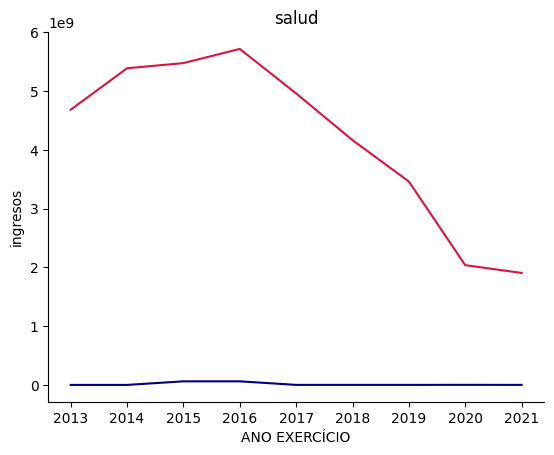

In [76]:
# Graficamos la evolución temporal
fs.evolucion_temporal(temporal_salud, "ANO EXERCÍCIO",["VALOR LANÇADO", "VALOR REALIZADO"])

### *Ministerio de Comunicaciones (Ministério das Comunicações)* 📢

In [77]:
# Vemos la información general del ministerio, sus ingresos y las unidades ministeriales que lo componen
fs.info_ministerio(datos_brasil, "Ministério das Comunicações")

Los órganos de los que se compone el Ministério das Comunicações son: ['Ministério das Comunicações - Unidades com vínculo direto'
 'Empresa Brasil de Comunicação' 'Agêncial Nacional de Telecomunicações'
 'Fundo de Universalização dos Serviços de Telecomunicações'
 'Fundo para o Desenvolvimento Tecnológico das Telecomunicações'
 'TELECOMUNICACOES BRASILEIRAS S/A']
Las unidades gestoras que componen los órganos del Ministério das Comunicações son: ['COORDENACAO-GERAL DE ORCAMENTO E FINANCAS'
 'EMPRESA BRASIL DE COMUNICACAO S.A'
 'AGENCIA NACIONAL DE TELECOMUNICACOES-SEDE'
 'FUNDO DE UNIVERS.DOS SERV.TELECOMUNICACOES'
 'FUNDO P/O DESENV.TECNOL.DAS TELECOMUNICACOES'
 'COORDENACAO-GERAL DE RECURSOS LOGISTICOS'
 'TELECOMUNICACOES BRASILEIRAS S/A']
Los ingresos entre 2013 y 2025 del Ministério das Comunicações son: 



,VALOR PREVISTO ATUALIZADO,VALOR LANÇADO,VALOR REALIZADO,porcentaje recaudado,diferencia_recaudacion
NOME ÓRGÃO SUPERIOR,,,,,
Ministério das Comunicações,"50,303,390,042.00","11,831.64","40,047,759,133.20",79.61,"40,047,747,301.56"


In [78]:
# Vemos la información temporal sobre el ministerio
temporal_comunicaciones = fs.info_ministerio(datos_brasil, "Ministério das Comunicações")
temporal_comunicaciones

,VALOR LANÇADO,VALOR REALIZADO
ANO EXERCÍCIO,,
2013,0.00,"5,153,572,668.12"
2014,0.00,"5,755,592,011.29"
2015,"5,915.82","5,870,302,865.73"
2016,"5,915.82","5,339,375,630.76"
2017,0.00,"4,671,806,312.39"
2018,0.00,"5,384,205,199.05"
2019,0.00,"3,359,414,370.75"
2020,0.00,"2,385,114,151.75"
2021,0.00,"2,128,375,923.36"


In [79]:
# Vemos la información sobre su composición.
fs.info_ministerio(datos_brasil, "Ministério das Comunicações")

VALOR PREVISTO ATUALIZADO  \
NOME ÓRGÃO                                         NOME UNIDADE GESTORA                                                      
Agêncial Nacional de Telecomunicações              AGENCIA NACIONAL DE TELECOMUNICACOES-SEDE             23,778,289,418.00   
Empresa Brasil de Comunicação                      EMPRESA BRASIL DE COMUNICACAO S.A                      2,598,708,867.00   
Fundo de Universalização dos Serviços de Teleco... FUNDO DE UNIVERS.DOS SERV.TELECOMUNICACOES            17,637,808,105.00   
Fundo para o Desenvolvimento Tecnológico das Te... FUNDO P/O DESENV.TECNOL.DAS TELECOMUNICACOES           4,280,588,000.00   
Ministério das Comunicações - Unidades com vínc... COORDENACAO-GERAL DE ORCAMENTO E FINANCAS                755,135,433.00   
                                                   COORDENACAO-GERAL DE RECURSOS LOGISTICOS                           0.00   
TELECOMUNICACOES BRASILEIRAS S/A                   TELECOMUNICACOES BRASILEIRAS S/A                       1,252,860,219.00   

                                                                                                 VALOR LANÇADO  \
NOME ÓRGÃO                                         NOME UNIDADE GESTORA                                          
Agêncial Nacional de Telecomunicações              AGENCIA NACIONAL DE TELECOMUNICACOES-SEDE              0.00   
Empresa Brasil de Comunicação                      EMPRESA BRASIL DE COMUNICACAO S.A                      0.00   
Fundo de Universalização dos Serviços de Teleco... FUNDO DE UNIVERS.DOS SERV.TELECOMUNICACOES             0.00   
Fundo para o Desenvolvimento Tecnológico das Te... FUNDO P/O DESENV.TECNOL.DAS TELECOMUNICACOES           0.00   
Ministério das Comunicações - Unidades com vínc... COORDENACAO-GERAL DE ORCAMENTO E FINANCAS              0.00   
                                                   COORDENACAO-GERAL DE RECURSOS LOGISTICOS          11,831.64   
TELECOMUNICACOES BRASILEIRAS S/A                   TELECOMUNICACOES BRASILEIRAS S/A                       0.00   

                                                                                                  VALOR REALIZADO  \
NOME ÓRGÃO                                         NOME UNIDADE GESTORA                                             
Agêncial Nacional de Telecomunicações              AGENCIA NACIONAL DE TELECOMUNICACOES-SEDE    18,018,890,765.26   
Empresa Brasil de Comunicação                      EMPRESA BRASIL DE COMUNICACAO S.A             4,116,687,398.08   
Fundo de Universalização dos Serviços de Teleco... FUNDO DE UNIVERS.DOS SERV.TELECOMUNICACOES   12,462,683,595.49   
Fundo para o Desenvolvimento Tecnológico das Te... FUNDO P/O DESENV.TECNOL.DAS TELECOMUNICACOES  4,844,932,795.59   
Ministério das Comunicações - Unidades com vínc... COORDENACAO-GERAL DE ORCAMENTO E FINANCAS        36,810,701.67   
                                                   COORDENACAO-GERAL DE RECURSOS LOGISTICOS                  0.00   
TELECOMUNICACOES BRASILEIRAS S/A                   TELECOMUNICACOES BRASILEIRAS S/A                567,753,877.11   

                                                                                                 porcentaje_recaudacion  
NOME ÓRGÃO                                         NOME UNIDADE GESTORA                                                  
Agêncial Nacional de Telecomunicações              AGENCIA NACIONAL DE TELECOMUNICACOES-SEDE                      75.78  
Empresa Brasil de Comunicação                      EMPRESA BRASIL DE COMUNICACAO S.A                             158.41  
Fundo de Universalização dos Serviços de Teleco... FUNDO DE UNIVERS.DOS SERV.TELECOMUNICACOES                     70.66  
Fundo para o Desenvolvimento Tecnológico das Te... FUNDO P/O DESENV.TECNOL.DAS TELECOMUNICACOES                  113.18  
Ministério das Comunicações - Unidades com vínc... COORDENACAO-GERAL DE ORCAMENTO E FINANCAS                       4.87  
                           

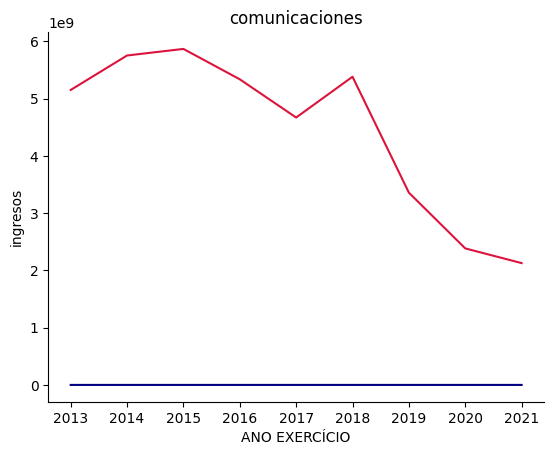

In [80]:
# Graficamos la evolución temporal
fs.evolucion_temporal(temporal_comunicaciones, "ANO EXERCÍCIO",["VALOR LANÇADO", "VALOR REALIZADO"])

### *Ministerio de Igualdad Racial (Igualdade Racial)*  👫

In [81]:
# Vemos la información general del ministerio, sus ingresos y las unidades ministeriales que lo componen
fs.info_ministerio(datos_brasil, "Ministério das Mulheres, Igualdade Racial, da")

Los órganos de los que se compone el Ministério das Mulheres, Igualdade Racial, da son: ['Fundo Nacional do Idoso' 'Fundo Nacional para a Criança e o Adolescente']
Las unidades gestoras que componen los órganos del Ministério das Mulheres, Igualdade Racial, da son: ['FUNDO NACIONAL DO IDOSO' 'FUNDO NACIONAL PARA A CRIANCA E O ADOLESCENTE'
 'FUNDO NACIONAL DO IDOSO - SET.ORC/FIN'
 'FUNDO NAC.P/A CRIANCA E O ADOLESC.SET.ORC/FIN']
Los ingresos entre 2013 y 2025 del Ministério das Mulheres, Igualdade Racial, da son: 



,VALOR PREVISTO ATUALIZADO,VALOR LANÇADO,VALOR REALIZADO,porcentaje recaudado,diferencia_recaudacion
NOME ÓRGÃO SUPERIOR,,,,,
"Ministério das Mulheres, Igualdade Racial, da","109,699,610.00",0.00,"136,845,774.52",124.75,"136,845,774.52"


In [82]:
# Vemos la información temporal sobre el ministerio
temporal_ig_racial = fs.info_ministerio(datos_brasil, "Ministério das Mulheres, Igualdade Racial, da")
temporal_ig_racial

,VALOR LANÇADO,VALOR REALIZADO
ANO EXERCÍCIO,,
2013,0.00,"20,660,063.80"
2014,0.00,"28,694,700.01"
2015,0.00,"44,371,022.78"
2016,0.00,"41,557,964.30"
2017,0.00,"1,559,532.86"
2018,0.00,67.41
2019,0.00,247.81
2020,0.00,"1,345.86"
2021,0.00,829.69


In [83]:
# Vemos la información sobre su composición.
fs.info_ministerio(datos_brasil, "Ministério das Mulheres, Igualdade Racial, da")

VALOR PREVISTO ATUALIZADO  \
NOME ÓRGÃO                                    NOME UNIDADE GESTORA                                                       
Fundo Nacional do Idoso                       FUNDO NACIONAL DO IDOSO                                    25,765,942.00   
                                              FUNDO NACIONAL DO IDOSO - SET.ORC/FIN                               0.00   
Fundo Nacional para a Criança e o Adolescente FUNDO NAC.P/A CRIANCA E O ADOLESC.SET.ORC/FIN                       0.00   
                                              FUNDO NACIONAL PARA A CRIANCA E O ADOLESCENTE              83,933,668.00   

                                                                                             VALOR LANÇADO  \
NOME ÓRGÃO                                    NOME UNIDADE GESTORA                                           
Fundo Nacional do Idoso                       FUNDO NACIONAL DO IDOSO                                 0.00   
                                              FUNDO NACIONAL DO IDOSO - SET.ORC/FIN                   0.00   
Fundo Nacional para a Criança e o Adolescente FUNDO NAC.P/A CRIANCA E O ADOLESC.SET.ORC/FIN           0.00   
                                              FUNDO NACIONAL PARA A CRIANCA E O ADOLESCENTE           0.00   

                                                                                             VALOR REALIZADO  \
NOME ÓRGÃO                                    NOME UNIDADE GESTORA                                             
Fundo Nacional do Idoso                       FUNDO NACIONAL DO IDOSO                          52,372,257.77   
                                              FUNDO NACIONAL DO IDOSO - SET.ORC/FIN               751,493.26   
Fundo Nacional para a Criança e o Adolescente FUNDO NAC.P/A CRIANCA E O ADOLESC.SET.ORC/FIN     1,605,014.13   
                                              FUNDO NACIONAL PARA A CRIANCA E O ADOLESCENTE    82,117,009.36   

                                                                                             porcentaje_recaudacion  
NOME ÓRGÃO                                    NOME UNIDADE GESTORA                                                   
Fundo Nacional do Idoso                       FUNDO NACIONAL DO IDOSO                                        203.26  
                                              FUNDO NACIONAL DO IDOSO - SET.ORC/FIN                             inf  
Fundo Nacional para a Criança e o Adolescente FUNDO NAC.P/A CRIANCA E O ADOLESC.SET.ORC/FIN                     inf  
                                              FUNDO NACIONAL PARA A CRIANCA E O ADOLESCENTE                   97.84

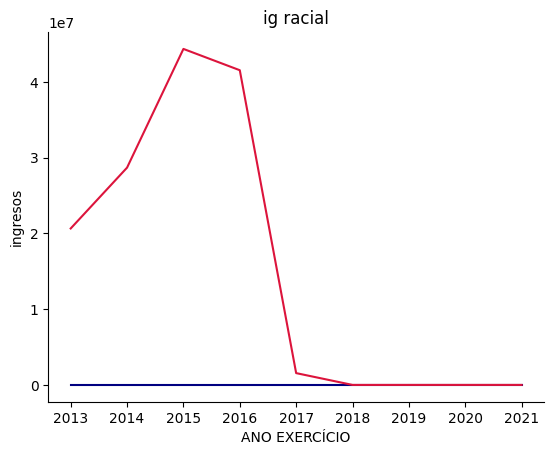

In [84]:
# Graficamos la evolución temporal
fs.evolucion_temporal(temporal_ig_racial, "ANO EXERCÍCIO",["VALOR LANÇADO", "VALOR REALIZADO"])

### *Ministerio de Asuntos Exteriores (Ministério das Relações Exteriores)* 🌎

In [85]:
# Vemos la información general del ministerio, sus ingresos y las unidades ministeriales que lo componen
fs.info_ministerio(datos_brasil, "Ministério das Relações Exteriores")

Los órganos de los que se compone el Ministério das Relações Exteriores son: ['Ministério das Relações Exteriores - Unidades com vínculo direto'
 'Fundação Alexandre de Gusmão']
Las unidades gestoras que componen los órganos del Ministério das Relações Exteriores son: ['COORDENACAO-GERAL DE ORCAMENTO E FINANCAS-MRE'
 'FUNDACAO ALEXANDRE DE GUSMAO' 'MRE - DIFERENCA CAMBIAL']
Los ingresos entre 2013 y 2025 del Ministério das Relações Exteriores son: 



,VALOR PREVISTO ATUALIZADO,VALOR LANÇADO,VALOR REALIZADO,porcentaje recaudado,diferencia_recaudacion
NOME ÓRGÃO SUPERIOR,,,,,
Ministério das Relações Exteriores,"5,328,738,148.00",0.00,"2,931,914,529.32",55.02,"2,931,914,529.32"


In [86]:
# Vemos la información temporal sobre el ministerio
temporal_relext = fs.info_ministerio(datos_brasil, "Ministério das Relações Exteriores")
temporal_relext

,VALOR LANÇADO,VALOR REALIZADO
ANO EXERCÍCIO,,
2013,0.00,"307,066,929.91"
2014,0.00,"381,992,502.88"
2015,0.00,"450,084,830.34"
2016,0.00,"456,721,220.46"
2017,0.00,"482,170,476.30"
2018,0.00,"296,119,881.60"
2019,0.00,"259,165,132.61"
2020,0.00,"161,059,565.28"
2021,0.00,"137,533,989.94"


In [87]:
# Vemos la información sobre su composición.
fs.info_ministerio(datos_brasil, "Ministério das Relações Exteriores")

VALOR PREVISTO ATUALIZADO  \
NOME ÓRGÃO                                         NOME UNIDADE GESTORA                                                       
Fundação Alexandre de Gusmão                       FUNDACAO ALEXANDRE DE GUSMAO                               12,532,684.00   
Ministério das Relações Exteriores - Unidades c... COORDENACAO-GERAL DE ORCAMENTO E FINANCAS-MRE           5,316,205,464.00   
                                                   MRE - DIFERENCA CAMBIAL                                             0.00   

                                                                                                  VALOR LANÇADO  \
NOME ÓRGÃO                                         NOME UNIDADE GESTORA                                           
Fundação Alexandre de Gusmão                       FUNDACAO ALEXANDRE DE GUSMAO                            0.00   
Ministério das Relações Exteriores - Unidades c... COORDENACAO-GERAL DE ORCAMENTO E FINANCAS-MRE           0.00   
                                                   MRE - DIFERENCA CAMBIAL                                 0.00   

                                                                                                  VALOR REALIZADO  \
NOME ÓRGÃO                                         NOME UNIDADE GESTORA                                             
Fundação Alexandre de Gusmão                       FUNDACAO ALEXANDRE DE GUSMAO                        980,057.53   
Ministério das Relações Exteriores - Unidades c... COORDENACAO-GERAL DE ORCAMENTO E FINANCAS-MRE 2,931,125,467.78   
                                                   MRE - DIFERENCA CAMBIAL                            -190,995.99   

                                                                                                  porcentaje_recaudacion  
NOME ÓRGÃO                                         NOME UNIDADE GESTORA                                                   
Fundação Alexandre de Gusmão                       FUNDACAO ALEXANDRE DE GUSMAO                                     7.82  
Ministério das Relações Exteriores - Unidades c... COORDENACAO-GERAL DE ORCAMENTO E FINANCAS-MRE                   55.14  
                                                   MRE - DIFERENCA CAMBIAL                                          -inf

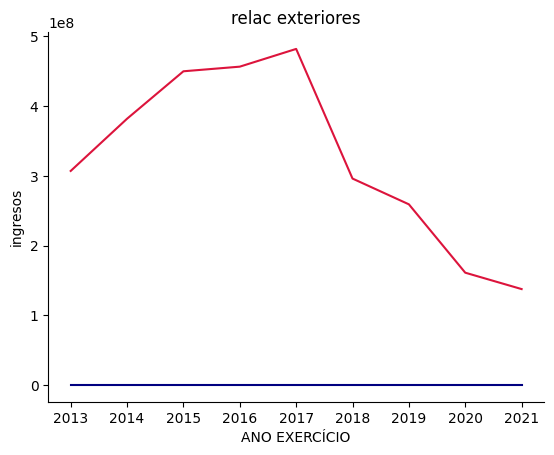

In [88]:
# Graficamos la evolución temporal
fs.evolucion_temporal(temporal_relext, "ANO EXERCÍCIO",["VALOR LANÇADO", "VALOR REALIZADO"])

In [23]:
datos_brasil.columns

Index(['CÓDIGO ÓRGÃO SUPERIOR', 'NOME ÓRGÃO SUPERIOR', 'CÓDIGO ÓRGÃO',
       'NOME ÓRGÃO', 'CÓDIGO UNIDADE GESTORA', 'NOME UNIDADE GESTORA',
       'CATEGORIA ECONÔMICA', 'ORIGEM RECEITA', 'ESPÉCIE RECEITA',
       'DETALHAMENTO', 'VALOR PREVISTO ATUALIZADO', 'VALOR LANÇADO',
       'VALOR REALIZADO', 'PERCENTUAL REALIZADO', 'DATA LANÇAMENTO',
       'ANO EXERCÍCIO'],
      dtype='object')

In [32]:
min_ext = datos_brasil[datos_brasil["NOME ÓRGÃO SUPERIOR"] == "Ministério das Relações Exteriores"]
neg_ext = min_ext[min_ext["VALOR REALIZADO"] < 0]
print("Son todo ingresos corrientes que son lo siguiente: \n")
print(f"{neg_ext["ESPÉCIE RECEITA"].unique()} \n") 
print(neg_ext["DETALHAMENTO"].unique())

Son todo ingresos corrientes que son lo siguiente: 

['Receitas Correntes - a classificar'
 'Exploração do patrimônio imobiliário do Estad'
 'Serviços Administrativos e Comerciais Gerais' 'Taxas'
 'Indenizações, restituições e ressarcimentos'] 

['Receitas Correntes - a classificar' 'ALUGUEIS E ARRENDAMENTOS-PRINCIPAL'
 'INSCR.EM CONCURSOS E PROC.SELETIVOS-PRINCIPAL'
 'TAXAS INSPECAO,CONTROLE E FISCALIZACAO-PRINC.'
 'SERV.ADMINISTRAT.E COMERCIAIS GERAIS-PRINC.'
 'TAXAS INSPEÇÃO,CONTROLE E FISCALIZAÇÃO-PRINC.'
 'REST.DESPESAS EXERC.ANT.FIN.FTE.PRIM.-PRINC.'
 'RESTIT.DESP.PRIMARIAS EX.ANTERIORES-MUL.JUR.'
 'RESTIT.DESP.PRIMARIAS EX.ANTERIORES-PRINC.']


### *Ministerio de Minas y Energía (Ministério de Minas e Energia)* 🔋

In [33]:
# Vemos la información general del ministerio, sus ingresos y las unidades ministeriales que lo componen
fs.info_ministerio(datos_brasil, "Ministério de Minas e Energia")

Los órganos de los que se compone el Ministério de Minas e Energia son: ['Indústrias Nucleares do Brasil'
 'Companhia de Pesquisa de Recursos Minerais'
 'Ministério de Minas e Energia - Unidades com vínculo direto'
 'Agência Nacional do Petróleo, Gás Natural e Biocombustíveis'
 'Departamento Nacional de Produção Mineral'
 'Agência Nacional de Energia Elétrica' 'Empresa de Pesquisa Energética'
 'Nuclebrás Equipamentos Pesados S.A.' 'Agência Nacional de Mineração']
Las unidades gestoras que componen los órganos del Ministério de Minas e Energia son: ['INDUSTRIAS NUCLEARES DO BRASIL S/A - INB'
 'COMPANHIA DE PESQUISA DE RECURSOS MINERAIS'
 'COORD.GERAL DE ORCAM.E FIN./M.M.E'
 'AG. NAC.DO PETROLEO GAS NAT.E BIOCOM'
 'DEPARTAMENTO NAC. DE PRODUCAO MINERAL - SEDE'
 'AGENCIA NACIONAL DE ENERGIA ELETRICA' 'EMPRESA DE PESQUISA ENERGETICA'
 'NUCLEBRAS EQUIPAMENTOS PESADOS S/A-NUCLEP'
 'SETORIAL ORCAMENTARIA E FINANCEIRA - ANM']
Los ingresos entre 2013 y 2025 del Ministério de Minas e Energia son

,VALOR PREVISTO ATUALIZADO,VALOR LANÇADO,VALOR REALIZADO,porcentaje recaudado,diferencia_recaudacion
NOME ÓRGÃO SUPERIOR,,,,,
Ministério de Minas e Energia,"354,233,973,334.00","13,136,233,568.97","191,485,924,485.02",54.06,"178,349,690,916.05"


In [34]:
# Vemos la información temporal sobre el ministerio
temporal_minas = fs.info_ministerio(datos_brasil, "Ministério de Minas e Energia")
temporal_minas

,VALOR LANÇADO,VALOR REALIZADO
ANO EXERCÍCIO,,
2013,"37,579,566.54","6,517,642,399.91"
2014,"39,775,761.82","5,735,356,458.86"
2015,"46,453,005.21","6,657,784,148.73"
2016,"49,597,862.63","24,617,041,919.67"
2017,"1,844,122,410.62","19,130,324,500.08"
2018,"1,803,187,320.79","8,202,188,763.94"
2019,"1,803,187,320.79","95,297,991,927.34"
2020,"4,657,758,820.68","11,309,673,231.19"
2021,"2,854,571,499.89","14,017,921,135.30"


In [35]:
# Vemos la información sobre su composición.
fs.info_ministerio(datos_brasil, "Ministério de Minas e Energia")

,,VALOR PREVISTO ATUALIZADO,VALOR LANÇADO,VALOR REALIZADO,porcentaje_recaudacion
NOME ÓRGÃO,NOME UNIDADE GESTORA,,,,
Agência Nacional de Energia Elétrica,AGENCIA NACIONAL DE ENERGIA ELETRICA,"14,090,143,180.00","7,660,721,898.08","61,093,095,412.38",433.59
Agência Nacional de Mineração,SETORIAL ORCAMENTARIA E FINANCEIRA - ANM,"7,217,378,410.00","5,470,469,349.32","21,041,550,743.49",291.54
"Agência Nacional do Petróleo, Gás Natural e Biocombustíveis",AG. NAC.DO PETROLEO GAS NAT.E BIOCOM,"47,759,269,587.00",0.00,"90,904,481,263.39",190.34
Companhia de Pesquisa de Recursos Minerais,COMPANHIA DE PESQUISA DE RECURSOS MINERAIS,"2,419,409,085.00","5,042,321.57","37,218,062.34",1.54
Departamento Nacional de Produção Mineral,DEPARTAMENTO NAC. DE PRODUCAO MINERAL - SEDE,"1,965,641,425.00",0.00,"9,727,062,978.45",494.85
Empresa de Pesquisa Energética,EMPRESA DE PESQUISA ENERGETICA,"120,787,427.00",0.00,"19,890,457.70",16.47
Indústrias Nucleares do Brasil,INDUSTRIAS NUCLEARES DO BRASIL S/A - INB,"5,274,338,213.00",0.00,"4,954,913,678.70",93.94
Ministério de Minas e Energia - Unidades com vínculo direto,COORD.GERAL DE ORCAM.E FIN./M.M.E,"274,634,469,161.00",0.00,"3,413,116,800.09",1.24
Nuclebrás Equipamentos Pesados S.A.,NUCLEBRAS EQUIPAMENTOS PESADOS S/A-NUCLEP,"752,536,846.00",0.00,"294,595,088.48",39.15


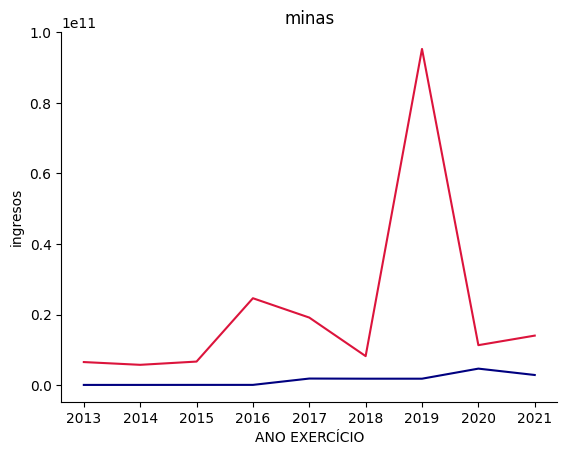

In [36]:
# Graficamos la evolución temporal
fs.evolucion_temporal(temporal_minas, "ANO EXERCÍCIO",["VALOR LANÇADO", "VALOR REALIZADO"])

### *Ministerio de Desarrollo Agrario (Ministério do Desenvolvimento Agrário)* 🌾

In [37]:
# Vemos la información general del ministerio, sus ingresos y las unidades ministeriales que lo componen
fs.info_ministerio(datos_brasil, "Ministério do Desenvolvimento Agrário")

Los órganos de los que se compone el Ministério do Desenvolvimento Agrário son: ['Ministério do Desenvolvimento Agrário - Unidades com vínculo direto']
Las unidades gestoras que componen los órganos del Ministério do Desenvolvimento Agrário son: ['SUBSEC. DE PLANEJ., ORCAMENTO E ADMINISTRACAO']
Los ingresos entre 2013 y 2025 del Ministério do Desenvolvimento Agrário son: 



,VALOR PREVISTO ATUALIZADO,VALOR LANÇADO,VALOR REALIZADO,porcentaje recaudado,diferencia_recaudacion
NOME ÓRGÃO SUPERIOR,,,,,
Ministério do Desenvolvimento Agrário,"558,355,581.00",0.00,"514,953,670.74",92.23,"514,953,670.74"


In [38]:
# Vemos la información temporal sobre el ministerio
temporal_agrario = fs.info_ministerio(datos_brasil, "Ministério do Desenvolvimento Agrário")
temporal_agrario

,VALOR LANÇADO,VALOR REALIZADO
ANO EXERCÍCIO,,
2013,0.00,"92,949,640.41"
2014,0.00,"129,068,487.07"
2015,0.00,"133,677,714.53"
2016,0.00,"110,673,046.54"
2017,0.00,"48,584,782.19"


In [39]:
# Vemos la información sobre su composición.
fs.info_ministerio(datos_brasil, "Ministério do Desenvolvimento Agrário")

,,VALOR PREVISTO ATUALIZADO,VALOR LANÇADO,VALOR REALIZADO,porcentaje_recaudacion
NOME ÓRGÃO,NOME UNIDADE GESTORA,,,,
Ministério do Desenvolvimento Agrário - Unidades com vínculo direto,"SUBSEC. DE PLANEJ., ORCAMENTO E ADMINISTRACAO","558,355,581.00",0.00,"514,953,670.74",92.23


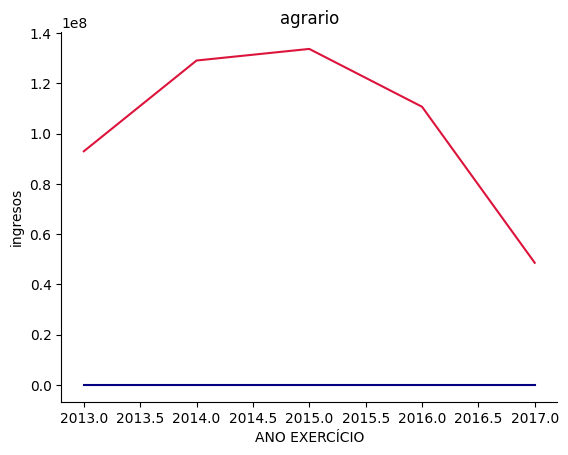

In [40]:
# Graficamos la evolución temporal
fs.evolucion_temporal(temporal_agrario, "ANO EXERCÍCIO",["VALOR LANÇADO", "VALOR REALIZADO"])

### *Ministerio de Integración y Desarrollo Regional (Ministério da Integração Desenvolvimento Regional)*

In [41]:
# Vemos la información general del ministerio, sus ingresos y las unidades ministeriales que lo componen
fs.info_ministerio(datos_brasil, "Ministério do Desenvolvimento Regional")

Los órganos de los que se compone el Ministério do Desenvolvimento Regional son: ['Empresa de Trens Urbanos de Porto Alegre'
 'Companhia Brasileira de Trens Urbanos'
 'Fundo Constitucional de Financiamento do Centro-Oeste'
 'Fundo Constitucional de Financiamento do Norte'
 'Fundo Constitucional de Financiamento do Nordeste'
 'Departamento Nacional de Obras Contra as Secas'
 'Companhia de Desenvolvimento dos Vales do São Francisco e do Parnaíba'
 'Ministério do Desenvolvimento Regional - Unidades com vínculo direto'
 'Superintendência do Desenvolvimento da Amazônia'
 'Fundo de Desenvolvimento da Amazônia'
 'Fundo Nacional de Habitação de Interesse Social'
 'Superintendência do Desenvolvimento do Nordeste'
 'Agência Nacional de Águas' 'Agência de Desenvolvimento da Amazônia'
 'Superintendência de Desenvolvimento do Centro-Oeste'
 'Fundo de Desenvolvimento do Nordeste'
 'Fundo de Desenvolvimento do Centro-Oeste']
Las unidades gestoras que componen los órganos del Ministério do Desenvolvim

,VALOR PREVISTO ATUALIZADO,VALOR LANÇADO,VALOR REALIZADO,porcentaje recaudado,diferencia_recaudacion
NOME ÓRGÃO SUPERIOR,,,,,
Ministério do Desenvolvimento Regional,"125,967,254,487.00",0.00,"19,356,487,150.32",15.37,"19,356,487,150.32"


In [42]:
# Vemos la información temporal sobre el ministerio
temporal_integración = fs.info_ministerio(datos_brasil, "Ministério do Desenvolvimento Regional")
temporal_integración

,VALOR LANÇADO,VALOR REALIZADO
ANO EXERCÍCIO,,
2013,0.00,"1,450,938,856.61"
2014,0.00,"1,730,734,116.78"
2015,0.00,"1,876,107,677.71"
2016,0.00,"2,062,404,013.95"
2017,0.00,"2,323,570,078.80"
2018,0.00,"2,002,641,331.44"
2019,0.00,"2,294,174,395.49"
2020,0.00,"3,535,217,999.47"
2021,0.00,"2,080,698,680.07"


In [43]:
# Vemos la información sobre su composición.
fs.info_ministerio(datos_brasil, "Ministério do Desenvolvimento Regional")

,,VALOR PREVISTO ATUALIZADO,VALOR LANÇADO,VALOR REALIZADO,porcentaje_recaudacion
NOME ÓRGÃO,NOME UNIDADE GESTORA,,,,
Agência Nacional de Águas,COORDENACAO DE ORCAMENTO E FINANCAS.,"2,742,042,242.00",0.00,"2,478,364,480.73",90.38
Agência de Desenvolvimento da Amazônia,AGENCIA DE DESENVOLVIMENTO DA AMAZONIA,0.00,0.00,"2,782.04",inf
Companhia Brasileira de Trens Urbanos,CIA BRASILEIRA DE TRENS URBANOS-ADM.CENTRAL,"2,033,300,943.00",0.00,"1,620,778,497.76",79.71
Companhia de Desenvolvimento dos Vales do São Francisco e do Parnaíba,CIA DE DES.DOS VALES DO S.FRANC.E DO PARNAIBA,"911,861,976.00",0.00,"346,071,849.20",37.95
Departamento Nacional de Obras Contra as Secas,DEPARTAMENTO NAC. DE OBRAS CONTRA AS SECAS/UO,"455,719,005.00",0.00,"52,138,566.40",11.44
Empresa de Trens Urbanos de Porto Alegre,EMPRESA DE TRENS URBANOS DE PORTO ALEGRE S/A,"1,205,667,469.00",0.00,"1,066,592,288.12",88.46
Fundo Constitucional de Financiamento do Centro-Oeste,FUNDO CONSTITUCIONL DO CENTRO OESTE,"21,475,973,213.00",0.00,0.00,0.00
Fundo Constitucional de Financiamento do Nordeste,FUNDO CONSTITUCIONAL DE FINANCIAM.DO NORDESTE,"64,427,919,612.00",0.00,0.00,0.00
Fundo Constitucional de Financiamento do Norte,FUNDO CONSTITUCIONAL FINANCIAMENTO NORTE,"21,475,973,214.00",0.00,0.00,0.00


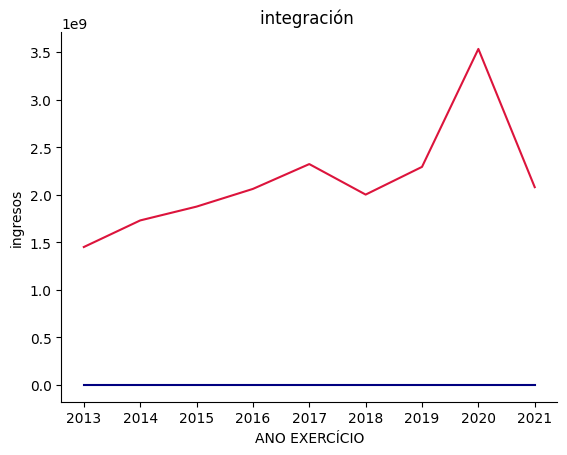

In [44]:
# Graficamos la evolución temporal
fs.evolucion_temporal(temporal_integración, "ANO EXERCÍCIO",["VALOR LANÇADO", "VALOR REALIZADO"])

### *Ministerio de Deportes (Ministério do Esporte)* 🏃

In [45]:
# Vemos la información general del ministerio, sus ingresos y las unidades ministeriales que lo componen
fs.info_ministerio(datos_brasil, "Ministério do Esporte")

Los órganos de los que se compone el Ministério do Esporte son: ['Autoridade Pública Olímpica']
Las unidades gestoras que componen los órganos del Ministério do Esporte son: ['AUTORIDADE PUBLICA OLIMPICA']
Los ingresos entre 2013 y 2025 del Ministério do Esporte son: 



,VALOR PREVISTO ATUALIZADO,VALOR LANÇADO,VALOR REALIZADO,porcentaje recaudado,diferencia_recaudacion
NOME ÓRGÃO SUPERIOR,,,,,
Ministério do Esporte,"120,909,686.40",0.00,"53,896,237.79",44.58,"53,896,237.79"


In [46]:
# Vemos la información temporal sobre el ministerio
temporal_deporte = fs.info_ministerio(datos_brasil, "Ministério do Esporte")
temporal_deporte

,VALOR LANÇADO,VALOR REALIZADO
ANO EXERCÍCIO,,
2013,0.00,"9,064,213.02"
2014,0.00,"18,604,642.00"
2015,0.00,"10,257,988.03"
2016,0.00,"7,640,475.44"
2017,0.00,"4,854,998.65"
2018,0.00,"3,473,921.47"
2019,0.00,-0.82


In [47]:
# Vemos la información sobre su composición.
fs.info_ministerio(datos_brasil, "Ministério do Esporte")

,,VALOR PREVISTO ATUALIZADO,VALOR LANÇADO,VALOR REALIZADO,porcentaje_recaudacion
NOME ÓRGÃO,NOME UNIDADE GESTORA,,,,
Autoridade Pública Olímpica,AUTORIDADE PUBLICA OLIMPICA,"120,909,686.40",0.00,"53,896,237.79",44.58


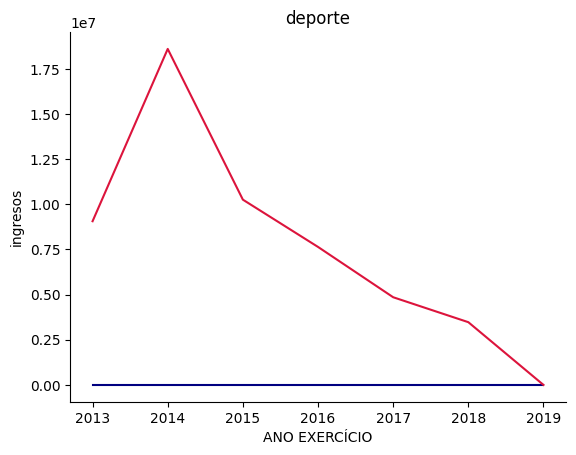

In [48]:
# Graficamos la evolución temporal
fs.evolucion_temporal(temporal_deporte, "ANO EXERCÍCIO",["VALOR LANÇADO", "VALOR REALIZADO"])

### *Ministerio de Medio Ambiente y Cambio Climático (Ministério do Meio Ambiente e Mudança do Clima)*

In [49]:
# Vemos la información general del ministerio, sus ingresos y las unidades ministeriales que lo componen
fs.info_ministerio(datos_brasil, "Ministério do Meio Ambiente")

Los órganos de los que se compone el Ministério do Meio Ambiente son: ['Instituto de Pesquisas Jardim Botânico do Rio de Janeiro'
 'Ministério do Meio Ambiente - Unidades com vínculo direto'
 'Fundo Nacional sobre Mudança no Clima'
 'Instituto Brasileiro do Meio Ambiente e dos Recursos Naturais Renováveis'
 'Instituto Chico Mendes de Conservação da Biodiversidade'
 'Fundo Nacional do Meio Ambiente'
 'Companhia de Desenvolvimento de Barcarena']
Las unidades gestoras que componen los órganos del Ministério do Meio Ambiente son: ['COORD. DE PLAN. ORCAMENTO E FIN./COPLAN/JBRJ'
 'SUBSECRET.PLANEJAM.ORCAM.E ADMINIST±SPOA(MMA)'
 'SETORIAL ORCAMENTARIA E FINANCEIRA DO FNMC'
 'IBAMA - INST.BRASILEIRO MEIO AMBIENTE/MATRIZ'
 'INST.CHICO MENDES DE CONSER.DA BIODIVERSIDADE'
 'SETORIAL ORCAMENTARIA E FINANCEIRA DO FNMA'
 'COMPANHIA DE DESENVOLVIMENTO DE BARCARENA'
 'IBAMA - SUPERINTENDENCIA DO ESPIRITO SANTO/ES'
 'IBAMA - SUPERINTENDENCIA DE PERNAMBUCO/PE'
 'IBAMA - SUPERINTENDENCIA DE SANTA CATARIN

,VALOR PREVISTO ATUALIZADO,VALOR LANÇADO,VALOR REALIZADO,porcentaje recaudado,diferencia_recaudacion
NOME ÓRGÃO SUPERIOR,,,,,
Ministério do Meio Ambiente,"12,106,708,057.00","4,506.00","7,127,409,730.62",58.87,"7,127,405,224.62"


In [50]:
# Vemos la información temporal sobre el ministerio
temporal_medioambiente = fs.info_ministerio(datos_brasil, "Ministério do Meio Ambiente")
temporal_medioambiente

,VALOR LANÇADO,VALOR REALIZADO
ANO EXERCÍCIO,,
2013,0.00,"534,545,656.44"
2014,0.00,"631,388,039.07"
2015,900.00,"533,598,622.20"
2016,900.00,"768,239,062.01"
2017,"2,706.00","1,135,614,571.01"
2018,0.00,"989,744,705.91"
2019,0.00,"808,365,378.36"
2020,0.00,"654,498,150.71"
2021,0.00,"1,071,415,544.91"


In [51]:
# Vemos la información sobre su composición.
fs.info_ministerio(datos_brasil, "Ministério do Meio Ambiente")

VALOR PREVISTO ATUALIZADO  \
NOME ÓRGÃO                                         NOME UNIDADE GESTORA                                                       
Companhia de Desenvolvimento de Barcarena          COMPANHIA DE DESENVOLVIMENTO DE BARCARENA                           0.00   
Fundo Nacional do Meio Ambiente                    SETORIAL ORCAMENTARIA E FINANCEIRA DO FNMA                356,594,392.00   
Fundo Nacional sobre Mudança no Clima              SETORIAL ORCAMENTARIA E FINANCEIRA DO FNMC                475,693,306.00   
Instituto Brasileiro do Meio Ambiente e dos Rec... IBAMA - INST.BRASILEIRO MEIO AMBIENTE/MATRIZ            5,167,413,084.00   
                                                   IBAMA - SUPERINTENDENCIA DE PERNAMBUCO/PE                           0.00   
                                                   IBAMA - SUPERINTENDENCIA DE RORAIMA/RR                              0.00   
                                                   IBAMA - SUPERINTENDENCIA DE SANTA CATARINA/SC                       0.00   
                                                   IBAMA - SUPERINTENDENCIA DE SAO PAULO/SP                            0.00   
                                                   IBAMA - SUPERINTENDENCIA DO ACRE/AC                                 0.00   
                                                   IBAMA - SUPERINTENDENCIA DO ESPIRITO SANTO/ES                       0.00   
                                                   IBAMA - SUPERINTENDENCIA DO MATO GROSSO/MT                          0.00   
                                                   IBAMA - SUPERINTENDENCIA DO PARA/PA                                 0.00   
                                                   IBAMA - SUPERINTENDENCIA DO TOCANTINS/TO                            0.00   
                                                   IBAMA - SUPERINTENDENCIA MATO GROSSO SUL/MS                         0.00   
                                                   IBAMA - SUPERINTENDENCIA RIO GRANDE NORTE/RN                        0.00   
Instituto Chico Mendes de Conservação da Biodiv... INST.CHICO MENDES DE CONSER.DA BIODIVERSIDADE           1,833,716,885.00   
Instituto de Pesquisas Jardim Botânico do Rio d... COORD. DE PLAN. ORCAMENTO E FIN./COPLAN/JBRJ               97,283,203.00   
Ministério do Meio Ambiente - Unidades com vínc... SUBSECRET.PLANEJAM.ORCAM.E ADMINIST±SPOA(MMA)           4,176,007,187.00   

                                                                                                  VALOR LANÇADO  \
NOME ÓRGÃO                                         NOME UNIDADE GESTORA                                           
Companhia de Desenvolvimento de Barcarena          COMPANHIA DE DESENVOLVIMENTO DE BARCARENA               0.00   
Fundo Nacional do Meio Ambiente                    SETORIAL ORCAMENTARIA E FINANCEIRA DO FNMA              0.00   
Fundo Nacional sobre Mudança no Clima              SETORIAL ORCAMENTARIA E FINANCEIRA DO FNMC              0.00   
Instituto Brasileiro do Meio Ambiente e dos Rec... IBAMA - INST.BRASILEIRO MEIO AMBIENTE/MATRIZ            0.00   
                                                   IBAMA - SUPERINTENDENCIA DE PERNAMBUCO/PE               0.00   
                                                   IBAMA - SUPERINTENDENCIA DE RORAIMA/RR                  0.00   
                                                   IBAMA - SUPERINTENDENCIA DE SANTA CATARINA/SC           0.00   
                                                   IBAMA - SUPERINTENDENCIA DE SAO PAULO/SP            1,800.00   
                                                   IBAMA - SUPERINTENDENCIA DO ACRE/AC                     0.00   
                                                   IBAMA - SUPERINTENDENCIA DO ESPIRITO SANTO/ES       2,700.00   
                                                   IBAMA - SUPERINTENDENCIA DO MATO GROSSO/MT              0.00   
                                                   IBAMA - SUP

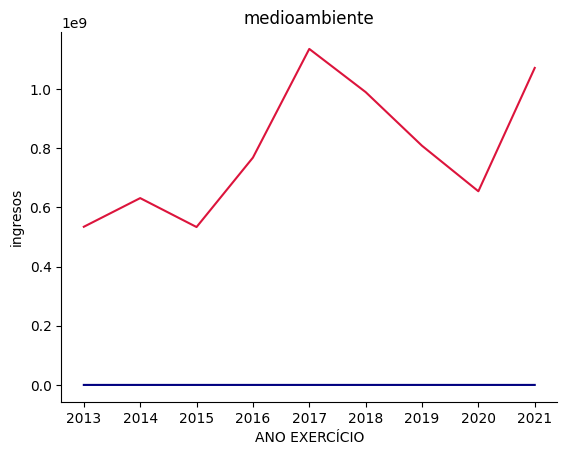

In [52]:
# Graficamos la evolución temporal
fs.evolucion_temporal(temporal_medioambiente, "ANO EXERCÍCIO",["VALOR LANÇADO", "VALOR REALIZADO"])

### *Ministerio de Trabajo y Empleo (Ministério do Trabalho e Emprego)*

In [54]:
# Vemos la información general del ministerio, sus ingresos y las unidades ministeriales que lo componen
fs.info_ministerio(datos_brasil, "Ministério do Trabalho e Emprego")

Los órganos de los que se compone el Ministério do Trabalho e Emprego son: ['Ministério do Trabalho e Emprego - Unidades com vínculo direto']
Las unidades gestoras que componen los órganos del Ministério do Trabalho e Emprego son: ['COORD-GERAL DE ORCAM., FIN. E CONTABILIDADE']
Los ingresos entre 2013 y 2025 del Ministério do Trabalho e Emprego son: 



,VALOR PREVISTO ATUALIZADO,VALOR LANÇADO,VALOR REALIZADO,porcentaje recaudado,diferencia_recaudacion
NOME ÓRGÃO SUPERIOR,,,,,
Ministério do Trabalho e Emprego,"14,328,825,280.00",0.00,"13,484,362,951.59",94.11,"13,484,362,951.59"


In [55]:
# Vemos la información temporal sobre el ministerio
temporal_trabajo = fs.info_ministerio(datos_brasil, "Ministério do Trabalho e Emprego")
temporal_trabajo

,VALOR LANÇADO,VALOR REALIZADO
ANO EXERCÍCIO,,
2013,0.00,"3,650,207,120.90"
2014,0.00,"4,066,697,882.25"
2015,0.00,"4,812,646,119.73"
2016,0.00,"954,529,170.00"
2017,0.00,"282,658.71"


In [56]:
# Vemos la información sobre su composición.
fs.info_ministerio(datos_brasil, "Ministério do Trabalho e Emprego")

,,VALOR PREVISTO ATUALIZADO,VALOR LANÇADO,VALOR REALIZADO,porcentaje_recaudacion
NOME ÓRGÃO,NOME UNIDADE GESTORA,,,,
Ministério do Trabalho e Emprego - Unidades com vínculo direto,"COORD-GERAL DE ORCAM., FIN. E CONTABILIDADE","14,328,825,280.00",0.00,"13,484,362,951.59",94.11


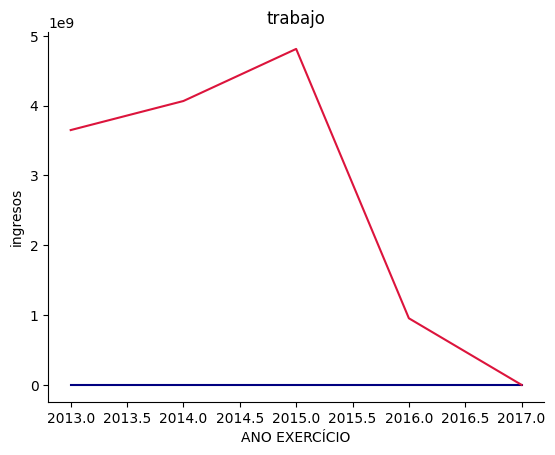

In [57]:
# Graficamos la evolución temporal
fs.evolucion_temporal(temporal_trabajo, "ANO EXERCÍCIO",["VALOR LANÇADO", "VALOR REALIZADO"])

### *Ministerio de Turismo (Ministério do Turismo)*

In [58]:
# Vemos la información general del ministerio, sus ingresos y las unidades ministeriales que lo componen
fs.info_ministerio(datos_brasil, "Ministério do Turismo")

Los órganos de los que se compone el Ministério do Turismo son: ['Fundação Casa de Rui Barbosa' 'Instituto Brasileiro de Turismo'
 'Instituto Brasileiro de Museus'
 'Instituto do Patrimônio Histórico e Artístico Nacional'
 'Fundação Nacional de Artes' 'Fundo Nacional de Cultura'
 'Agência Nacional do Cinema'
 'Ministério do Turismo - Unidades com vínculo direto'
 'Fundação Cultural Palmares' 'Fundação Biblioteca Nacional'
 'Fundo Geral de Turismo']
Las unidades gestoras que componen los órganos del Ministério do Turismo son: ['FUNDACAO CASA DE RUI BARBOSA'
 'INSTITUTO BRASILEIRO DE TURISMO - EM EXTINCAO'
 'INSTITUTO BRASILEIRO DE MUSEUS - IBRAM'
 'INSTITUTO DO PATRIMONIO HIST. E ART. NACIONAL'
 'FUNDACAO NACIONAL DE ARTES'
 'COORD.GERAL DE PLAN. ORC. FIN. E CONTAB/FNC'
 'AGENCIA NACIONAL DO CINEMA' 'CGOFC - SETORIAL/MTUR'
 'FUNDACAO CULTURAL PALMARES' 'FUNDACAO BIBLIOTECA NACIONAL'
 'FUNDO GERAL DE TURISMO-FUNGETUR' 'FUNDO NACIONAL DA CULTURA - FNC']
Los ingresos entre 2013 y 2025 del 

,VALOR PREVISTO ATUALIZADO,VALOR LANÇADO,VALOR REALIZADO,porcentaje recaudado,diferencia_recaudacion
NOME ÓRGÃO SUPERIOR,,,,,
Ministério do Turismo,"13,828,150,327.00","51,866,238.80","13,535,637,878.06",97.88,"13,483,771,639.26"


In [59]:
# Vemos la información temporal sobre el ministerio
temporal_turismo = fs.info_ministerio(datos_brasil, "Ministério do Turismo")
temporal_turismo

,VALOR LANÇADO,VALOR REALIZADO
ANO EXERCÍCIO,,
2013,"8,288,903.28","1,396,181,318.17"
2014,"2,982,577.28","1,548,958,074.22"
2015,"5,074,344.78","1,429,566,207.11"
2016,"5,074,344.78","1,571,548,246.16"
2017,"5,074,344.78","1,574,835,898.14"
2018,"5,074,344.78","1,043,110,398.43"
2019,"5,074,344.78","1,309,053,992.45"
2020,"10,148,689.56","2,031,843,398.75"
2021,"5,074,344.78","1,630,540,344.63"


In [60]:
# Vemos la información sobre su composición.
fs.info_ministerio(datos_brasil, "Ministério do Turismo")

VALOR PREVISTO ATUALIZADO  \
NOME ÓRGÃO                                         NOME UNIDADE GESTORA                                                       
Agência Nacional do Cinema                         AGENCIA NACIONAL DO CINEMA                                135,514,150.00   
Fundação Biblioteca Nacional                       FUNDACAO BIBLIOTECA NACIONAL                               76,036,480.00   
Fundação Casa de Rui Barbosa                       FUNDACAO CASA DE RUI BARBOSA                               27,822,117.00   
Fundação Cultural Palmares                         FUNDACAO CULTURAL PALMARES                                 15,611,578.00   
Fundação Nacional de Artes                         FUNDACAO NACIONAL DE ARTES                                 70,908,108.00   
Fundo Geral de Turismo                             FUNDO GERAL DE TURISMO-FUNGETUR                           529,385,793.00   
Fundo Nacional de Cultura                          COORD.GERAL DE PLAN. ORC. FIN. E CONTAB/FNC            11,115,674,727.00   
                                                   FUNDO NACIONAL DA CULTURA - FNC                         1,224,817,818.00   
Instituto Brasileiro de Museus                     INSTITUTO BRASILEIRO DE MUSEUS - IBRAM                    132,727,584.00   
Instituto Brasileiro de Turismo                    INSTITUTO BRASILEIRO DE TURISMO - EM EXTINCAO              43,455,625.00   
Instituto do Patrimônio Histórico e Artístico N... INSTITUTO DO PATRIMONIO HIST. E ART. NACIONAL             261,873,089.00   
Ministério do Turismo - Unidades com vínculo di... CGOFC - SETORIAL/MTUR                                     194,323,258.00   

                                                                                                  VALOR LANÇADO  \
NOME ÓRGÃO                                         NOME UNIDADE GESTORA                                           
Agência Nacional do Cinema                         AGENCIA NACIONAL DO CINEMA                     51,866,238.80   
Fundação Biblioteca Nacional                       FUNDACAO BIBLIOTECA NACIONAL                            0.00   
Fundação Casa de Rui Barbosa                       FUNDACAO CASA DE RUI BARBOSA                            0.00   
Fundação Cultural Palmares                         FUNDACAO CULTURAL PALMARES                              0.00   
Fundação Nacional de Artes                         FUNDACAO NACIONAL DE ARTES                              0.00   
Fundo Geral de Turismo                             FUNDO GERAL DE TURISMO-FUNGETUR                         0.00   
Fundo Nacional de Cultura                          COORD.GERAL DE PLAN. ORC. FIN. E CONTAB/FNC             0.00   
                                                   FUNDO NACIONAL DA CULTURA - FNC                         0.00   
Instituto Brasileiro de Museus                     INSTITUTO BRASILEIRO DE MUSEUS - IBRAM                  0.00   
Instituto Brasileiro de Turismo                    INSTITUTO BRASILEIRO DE TURISMO - EM EXTINCAO           0.00   
Instituto do Patrimônio Histórico e Artístico N... INSTITUTO DO PATRIMONIO HIST. E ART. NACIONAL           0.00   
Ministério do Turismo - Unidades com vínculo di... CGOFC - SETORIAL/MTUR                                   0.00   

                                                                                                  VALOR REALIZADO  \
NOME ÓRGÃO                                         NOME UNIDADE GESTORA                                             
Agência Nacional do Cinema                         AGENCIA NACIONAL DO CINEMA                       24,034,022.82   
Fundação Biblioteca Nacional                       FUNDACAO BIBLIOTECA NACIONAL                     28,361,186.95   
Fundação Casa de Rui Barbosa                       FUNDACAO CASA DE RUI BARBOSA                        291,631.42   
Fundação Cultural Palmares                         FUNDACAO CULTURAL PALMARES                        1,974,813.30   
Fundaç

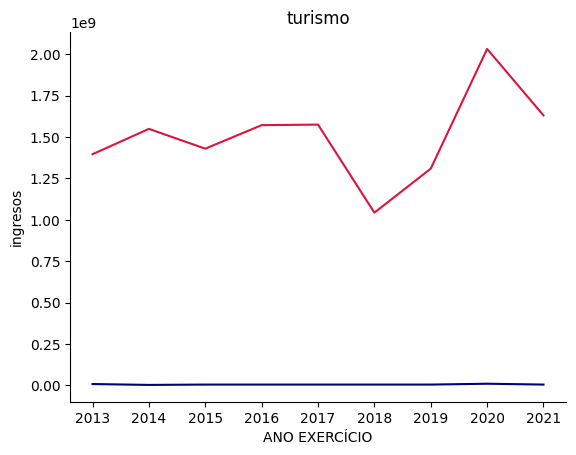

In [61]:
# Graficamos la evolución temporal
fs.evolucion_temporal(temporal_turismo, "ANO EXERCÍCIO",["VALOR LANÇADO", "VALOR REALIZADO"])

### *Presidencia de la República (Presidência da República)*

In [62]:
# Vemos la información general del ministerio, sus ingresos y las unidades ministeriales que lo componen
fs.info_ministerio(datos_brasil, "Presidência da República")

Los órganos de los que se compone el Presidência da República son: ['Presidência da República'
 'Secretaria de Políticas de Promoção da Igualdade Racial'
 'Secretaria de Direitos Humanos' 'Fundo de Imprensa Nacional'
 'Secretaria da Micro e Pequena Empresa'
 'Instituto Nacional de Tecnologia da Informação'
 'Gabinete da Vice-Presidência da República' 'Fundo Nacional Antidrogas'
 'Secretaria de Assuntos Estratégicos']
Las unidades gestoras que componen los órganos del Presidência da República son: ['SECRETARIA DE ADMINISTRACAO-SET.ORC.E FIN./PR'
 'SECRETARIA DE POLIT. DE PROM.DA IGUALD.RACIAL'
 'SECRETARIA DE DIREITOS HUMANOS/PR'
 'FUNDO DE IMPRENSA NACIONAL/EXEC.ORC.FINANC.'
 'SECRETARIA DA MICRO E PEQUENA EMPRESA'
 'INSTITUTO NAC.DE TECNOLOGIA DA INFORMACAO ITI'
 'GABINETE DA VICE-PRESIDENCIA DA REPUBLICA' 'FUNDO NACIONAL ANTIDROGAS'
 'SECRETARIA DE ASSUNTOS ESTRATEGICOS-SAE/PR']
Los ingresos entre 2013 y 2025 del Presidência da República son: 



,VALOR PREVISTO ATUALIZADO,VALOR LANÇADO,VALOR REALIZADO,porcentaje recaudado,diferencia_recaudacion
NOME ÓRGÃO SUPERIOR,,,,,
Presidência da República,"64,130,813,734.00",0.00,"16,491,839,911.74",25.72,"16,491,839,911.74"


In [63]:
# Vemos la información temporal sobre el ministerio
temporal_presidencia = fs.info_ministerio(datos_brasil, "Presidência da República")
temporal_presidencia

,VALOR LANÇADO,VALOR REALIZADO
ANO EXERCÍCIO,,
2013,0.00,"275,899,186.38"
2014,0.00,"675,145,839.57"
2015,0.00,"809,080,481.40"
2016,0.00,"1,137,344,518.30"
2017,0.00,"1,294,520,913.89"
2018,0.00,"2,955,882,143.23"
2019,0.00,"3,425,405,290.38"
2020,0.00,"3,503,410,544.06"
2021,0.00,"2,415,150,994.53"


In [64]:
# Vemos la información sobre su composición.
fs.info_ministerio(datos_brasil, "Presidência da República")

,,VALOR PREVISTO ATUALIZADO,VALOR LANÇADO,VALOR REALIZADO,porcentaje_recaudacion
NOME ÓRGÃO,NOME UNIDADE GESTORA,,,,
Fundo Nacional Antidrogas,FUNDO NACIONAL ANTIDROGAS,0.00,0.00,"93,555.20",inf
Fundo de Imprensa Nacional,FUNDO DE IMPRENSA NACIONAL/EXEC.ORC.FINANC.,"1,703,410,871.00",0.00,"1,637,529,811.25",96.13
Gabinete da Vice-Presidência da República,GABINETE DA VICE-PRESIDENCIA DA REPUBLICA,"12,945,515.00",0.00,"25,271.47",0.20
Instituto Nacional de Tecnologia da Informação,INSTITUTO NAC.DE TECNOLOGIA DA INFORMACAO ITI,"27,533,986.00",0.00,"7,946,344.01",28.86
Presidência da República,SECRETARIA DE ADMINISTRACAO-SET.ORC.E FIN./PR,"62,262,221,500.00",0.00,"14,624,394,871.41",23.49
Secretaria da Micro e Pequena Empresa,SECRETARIA DA MICRO E PEQUENA EMPRESA,"124,701,862.00",0.00,"97,207,586.50",77.95
Secretaria de Assuntos Estratégicos,SECRETARIA DE ASSUNTOS ESTRATEGICOS-SAE/PR,0.00,0.00,"11,540.93",inf
Secretaria de Direitos Humanos,SECRETARIA DE DIREITOS HUMANOS/PR,0.00,0.00,"117,514,785.44",inf
Secretaria de Políticas de Promoção da Igualdade Racial,SECRETARIA DE POLIT. DE PROM.DA IGUALD.RACIAL,0.00,0.00,"7,116,145.53",inf


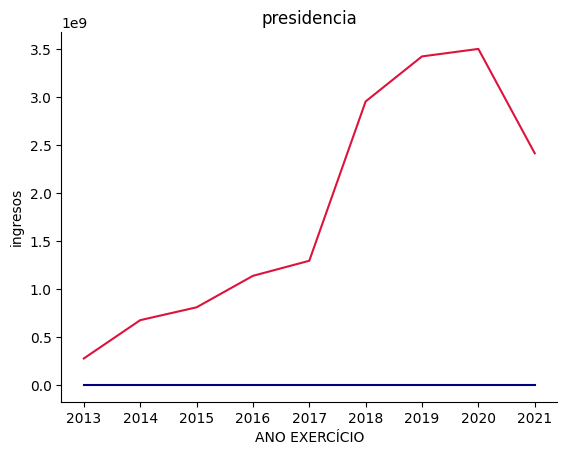

In [65]:
# Graficamos la evolución temporal
fs.evolucion_temporal(temporal_presidencia, "ANO EXERCÍCIO",["VALOR LANÇADO", "VALOR REALIZADO"])